In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import plotly.express as px
import scipy.stats as stats
import plotly.io as pio
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# Set pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

# Suppress warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Metrics
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

C:\Users\Orange\AppData\Local\Temp\ipykernel_23548\3635082403.py:23: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
data = pd.read_csv("kc_house_data.csv")

# Explanation Code:

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space (sqft_above + sqft_basement)

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not (1=true,0=false)

view - An index from (0 to 4) of how good the view of the property was

condition - An index from (1 to 5) on the condition of the apartment,

grade - An index from (1 to 13), where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [3]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0  3         1.00       1180          
1  6414100192  20141209T000000  538000.0  3         2.25       2570          
2  5631500400  20150225T000000  180000.0  2         1.00       770           
3  2487200875  20141209T000000  604000.0  4         3.00       1960          
4  1954400510  20150218T000000  510000.0  3         2.00       1680          

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0  5650      1.0     0           0     3          7      1180         
1  7242      2.0     0           0     3          7      2170         
2  10000     1.0     0           0     3          6      770          
3  5000      1.0     0           0     5          7      1050         
4  8080      1.0     0           0     3          8      1680         

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0  0              1955      0             98178    47.5112 -122.257   
1  400            1951      1991          98125    47.7210 -122.319   
2  0              1933      0             98028    47.7379 -122.233   
3  910            1965      0             98136    47.5208 -122.393   
4  0              1987      0             98074    47.6168 -122.045   

   sqft_living15  sqft_lot15  
0  1340           5650        
1  1690           7639        
2  2720           8062        
3  1360           5000        
4  1800           7503

In [4]:
data.shape

(21613, 21)

# Basic Data Exploration

In [5]:
# general describtion about the data
round(data.describe().T.drop(columns=['count']),3)

mean           std          min           25%  \
id             4.580302e+09  2.876566e+09  1000102.000  2.123049e+09   
price          5.400881e+05  3.671272e+05  75000.000    3.219500e+05   
bedrooms       3.371000e+00  9.300000e-01  0.000        3.000000e+00   
bathrooms      2.115000e+00  7.700000e-01  0.000        1.750000e+00   
sqft_living    2.079900e+03  9.184410e+02  290.000      1.427000e+03   
sqft_lot       1.510697e+04  4.142051e+04  520.000      5.040000e+03   
floors         1.494000e+00  5.400000e-01  1.000        1.000000e+00   
waterfront     8.000000e-03  8.700000e-02  0.000        0.000000e+00   
view           2.340000e-01  7.660000e-01  0.000        0.000000e+00   
condition      3.409000e+00  6.510000e-01  1.000        3.000000e+00   
grade          7.657000e+00  1.175000e+00  1.000        7.000000e+00   
sqft_above     1.788391e+03  8.280910e+02  290.000      1.190000e+03   
sqft_basement  2.915090e+02  4.425750e+02  0.000        0.000000e+00   
yr_built       1.971005e+03  2.937300e+01  1900.000     1.951000e+03   
yr_renovated   8.440200e+01  4.016790e+02  0.000        0.000000e+00   
zipcode        9.807794e+04  5.350500e+01  98001.000    9.803300e+04   
lat            4.756000e+01  1.390000e-01  47.156       4.747100e+01   
long          -1.222140e+02  1.410000e-01 -122.519     -1.223280e+02   
sqft_living15  1.986552e+03  6.853910e+02  399.000      1.490000e+03   
sqft_lot15     1.276846e+04  2.730418e+04  651.000      5.100000e+03   

                        50%           75%           max  
id             3.904930e+09  7.308900e+09  9.900000e+09  
price          4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.757200e+01  4.767800e+01  4.777800e+01  
long          -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     7.620000e+03  1.008300e+04  8.712000e+05

In [6]:
# Some information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# Checking if there are any missing values
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# The names of the columns
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
# Number of the unique values in each column
data.nunique()

id               21436
date             372  
price            4028 
bedrooms         13   
bathrooms        30   
sqft_living      1038 
sqft_lot         9782 
floors           6    
waterfront       2    
view             5    
condition        5    
grade            12   
sqft_above       946  
sqft_basement    306  
yr_built         116  
yr_renovated     70   
zipcode          70   
lat              5034 
long             752  
sqft_living15    777  
sqft_lot15       8689 
dtype: int64

In [10]:
data.head(3)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0  3         1.00       1180          
1  6414100192  20141209T000000  538000.0  3         2.25       2570          
2  5631500400  20150225T000000  180000.0  2         1.00       770           

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0  5650      1.0     0           0     3          7      1180         
1  7242      2.0     0           0     3          7      2170         
2  10000     1.0     0           0     3          6      770          

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0  0              1955      0             98178    47.5112 -122.257   
1  400            1951      1991          98125    47.7210 -122.319   
2  0              1933      0             98028    47.7379 -122.233   

   sqft_living15  sqft_lot15  
0  1340           5650        
1  1690           7639        
2  2720           8062

In [11]:
data2 = data.copy()

# Convert the sqft to meter square and rename that columns.

In [12]:
column_rename = {
    'sqft_living': 'living_meter',
    'sqft_lot': 'lot_meter',
    'sqft_above': 'above_meter',
    'sqft_basement': 'basement_meter',
    'sqft_living15': 'living15_meter',
    'sqft_lot15': 'lot15_meter'
}

data2 = data.rename(columns=column_rename)

columns_to_convert = ['living_meter', 'lot_meter', 'above_meter', 'basement_meter', 'living15_meter', 'lot15_meter']

# multiply with 0.092903 to convert from sqft to meter square

data2.loc[:, columns_to_convert] = data2.loc[:, columns_to_convert].apply(lambda x: round(x * 0.092903,3))

In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21613 non-null  int64  
 1   date            21613 non-null  object 
 2   price           21613 non-null  float64
 3   bedrooms        21613 non-null  int64  
 4   bathrooms       21613 non-null  float64
 5   living_meter    21613 non-null  float64
 6   lot_meter       21613 non-null  float64
 7   floors          21613 non-null  float64
 8   waterfront      21613 non-null  int64  
 9   view            21613 non-null  int64  
 10  condition       21613 non-null  int64  
 11  grade           21613 non-null  int64  
 12  above_meter     21613 non-null  float64
 13  basement_meter  21613 non-null  float64
 14  yr_built        21613 non-null  int64  
 15  yr_renovated    21613 non-null  int64  
 16  zipcode         21613 non-null  int64  
 17  lat             21613 non-null 

# Change the incorrect data types and add new features


In [14]:
#converting Date column from object to datetime
data2['date']= data2['date'].apply(pd.to_datetime) 
#extracting year and month from Date
data2['sale_year']= data2['date'].dt.year   
data2['sale_month']= data2['date'].dt.month.astype('object')

In [15]:
# Rounding off Floors and converting it into object type
data2['floors'] = data2['floors'].astype('object')

In [16]:
# Converting Waterfront, View, Condition, and Grade into object type
data2['waterfront'] = data2['waterfront'].astype('object')
data2['view'] = data2['view'].astype('object')
data2['condition'] = data2['condition'].astype('object')
data2['grade'] = data2['grade'].astype('object')

In [17]:
# The age of the house
data2['age'] = data2['sale_year'] - data2['yr_built']
data2.loc[data2['age'] ==-1, 'age'] = 0

In [18]:
# The price of the meter square for the house.
data2['price_per_meter'] = data2['price'] / data2['living_meter']

In [19]:
data2['is_renovated'] = data2['yr_renovated'].apply(lambda x: 1 if x != 0 else 0).astype('object')

Dropping the unnecessary columns:
 - Drop The "id" feature because it is not important.
 - Drop the "yr_renovated" variable, because some houses weren't renovated since it was built. we replaced it with a new column "is_renovated" which gives 1 if the house has been renovated and 0 if it's never been renovated.
 - Drop "yr_built" and replace it with "age" column.
 - Drop "date" and replace it with "sale_year" column and "sale_month" column.

In [20]:
# Dropping these columns as they are not needed.
data3 = data2.copy()
data3= data3.drop(['id', 'date','yr_built','yr_renovated'], axis=1)
data3.head(2)

price  bedrooms  bathrooms  living_meter  lot_meter floors waterfront  \
0  221900.0  3         1.00       109.626       524.902    1.0    0           
1  538000.0  3         2.25       238.761       672.804    2.0    0           

  view condition grade  above_meter  basement_meter  zipcode      lat  \
0  0    3         7     109.626      0.000           98178    47.5112   
1  0    3         7     201.600      37.161          98125    47.7210   

      long  living15_meter  lot15_meter  sale_year sale_month  age  \
0 -122.257  124.490         524.902      2014       10         59    
1 -122.319  157.006         709.686      2014       12         63    

   price_per_meter is_renovated  
0  2024.154854      0            
1  2253.299324      1

In [21]:
data3.shape

(21613, 22)

## Some General info about the dataset

In [22]:
# Most expensive house
data3[data3.price == data3.price.max()]

price  bedrooms  bathrooms  living_meter  lot_meter floors  \
7252  7700000.0  6         8.0        1119.481      2564.123   2.5     

     waterfront view condition grade  above_meter  basement_meter  zipcode  \
7252  0          3    4         13    796.179      323.302         98102     

          lat     long  living15_meter  lot15_meter  sale_year sale_month  \
7252  47.6298 -122.323  366.038         817.546      2014       10          

      age  price_per_meter is_renovated  
7252  104  6878.187303      1

In [23]:
# cheapest house
data3[data3.price == data3.price.min()]

price  bedrooms  bathrooms  living_meter  lot_meter floors waterfront  \
1149  75000.0  1         0.0        62.245        4029.853   1.0    0           

     view condition grade  above_meter  basement_meter  zipcode      lat  \
1149  0    3         3     62.245       0.0             98022    47.2638   

         long  living15_meter  lot15_meter  sale_year sale_month  age  \
1149 -121.906  107.767         3983.866     2015       2          49    

      price_per_meter is_renovated  
1149  1204.916058      0

In [24]:
# maximum price per meter
data3[data3.price_per_meter == data3.price_per_meter.max()]

price  bedrooms  bathrooms  living_meter  lot_meter floors  \
19336  874950.0  2         1.0        100.335       371.612    1.0     

      waterfront view condition grade  above_meter  basement_meter  zipcode  \
19336  0          0    3         7     100.335      0.0             98117     

           lat     long  living15_meter  lot15_meter  sale_year sale_month  \
19336  47.6902 -122.387  142.142         393.909      2015       4           

       age  price_per_meter is_renovated  
19336  75   8720.287038      0

In [25]:
# most expensive house from the oldest houses
a = data3[data3.age == data3.age.max()]
a[a.price== a.price.max()]

price  bedrooms  bathrooms  living_meter  lot_meter floors  \
2007  1015000.0  4         2.5        274.993       442.218    2.0     

     waterfront view condition grade  above_meter  basement_meter  zipcode  \
2007  0          0    3         8     200.67       74.322          98102     

          lat     long  living15_meter  lot15_meter  sale_year sale_month  \
2007  47.6367 -122.318  148.645         442.218      2015       3           

      age  price_per_meter is_renovated  
2007  115  3691.003044      0

In [26]:
# maximum number of bedrooms
data3[data3.bedrooms == data3.bedrooms.max()]

price  bedrooms  bathrooms  living_meter  lot_meter floors  \
15870  640000.0  33        1.75       150.503       557.418    1.0     

      waterfront view condition grade  above_meter  basement_meter  zipcode  \
15870  0          0    5         7     96.619       53.884          98103     

           lat     long  living15_meter  lot15_meter  sale_year sale_month  \
15870  47.6878 -122.331  123.561         436.644      2014       6           

       age  price_per_meter is_renovated  
15870  67   4252.406929      0

In [27]:
# maximum number of bathrooms
data3[data3.bathrooms == data3.bathrooms.max()]

price  bedrooms  bathrooms  living_meter  lot_meter floors  \
7252   7700000.0  6         8.0        1119.481      2564.123   2.5     
12777  2280000.0  7         8.0        1257.907      28591.084  3.0     

      waterfront view condition grade  above_meter  basement_meter  zipcode  \
7252   0          3    4         13    796.179      323.302         98102     
12777  0          4    3         12    874.217      383.689         98053     

           lat     long  living15_meter  lot15_meter  sale_year sale_month  \
7252   47.6298 -122.323  366.038         817.546      2014       10          
12777  47.6675 -121.986  450.580         20234.273    2014       5           

       age  price_per_meter is_renovated  
7252   104  6878.187303      1            
12777  15   1812.534631      0

In [28]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21613 non-null  float64
 1   bedrooms         21613 non-null  int64  
 2   bathrooms        21613 non-null  float64
 3   living_meter     21613 non-null  float64
 4   lot_meter        21613 non-null  float64
 5   floors           21613 non-null  object 
 6   waterfront       21613 non-null  object 
 7   view             21613 non-null  object 
 8   condition        21613 non-null  object 
 9   grade            21613 non-null  object 
 10  above_meter      21613 non-null  float64
 11  basement_meter   21613 non-null  float64
 12  zipcode          21613 non-null  int64  
 13  lat              21613 non-null  float64
 14  long             21613 non-null  float64
 15  living15_meter   21613 non-null  float64
 16  lot15_meter      21613 non-null  float64
 17  sale_year   

In [29]:
Continuous_data = data3.select_dtypes(include=["int64" , 'float64'])
Continuous = data3.select_dtypes(include=["int64" , 'float64']).columns

print('Number of Continuous feature:', Continuous.shape[0])

print('Continuous feature names:', Continuous.to_list())

Number of Continuous feature: 15
Continuous feature names: ['price', 'bedrooms', 'bathrooms', 'living_meter', 'lot_meter', 'above_meter', 'basement_meter', 'zipcode', 'lat', 'long', 'living15_meter', 'lot15_meter', 'sale_year', 'age', 'price_per_meter']


In [30]:
Categorical_data = data3.select_dtypes(include = 'object')
Categorical = data3.select_dtypes(include=["object"]).columns

print('Number of Categorical feature:', Categorical.shape[0])

print('Categorical feature names:', Categorical.to_list())

Number of Categorical feature: 7
Categorical feature names: ['floors', 'waterfront', 'view', 'condition', 'grade', 'sale_month', 'is_renovated']


In [31]:
round(data3.describe().T.drop(columns=['count']),3)

mean         std        min         25%         50%  \
price            540088.142  367127.196  75000.000  321950.000  450000.000   
bedrooms         3.371       0.930       0.000      3.000       3.000        
bathrooms        2.115       0.770       0.000      1.750       2.250        
living_meter     193.229     85.326      26.942     132.573     177.445      
lot_meter        1403.483    3848.090    48.310     468.231     707.735      
above_meter      166.147     76.932      26.942     110.555     144.929      
basement_meter   27.082      41.117      0.000      0.000       0.000        
zipcode          98077.940   53.505      98001.000  98033.000   98065.000    
lat              47.560      0.139       47.156     47.471      47.572       
long            -122.214     0.141      -122.519   -122.328    -122.230      
living15_meter   184.557     63.675      37.068     138.425     170.942      
lot15_meter      1186.228    2536.640    60.480     473.805     707.921      
sale_year        2014.323    0.468       2014.000   2014.000    2014.000     
age              43.318      29.375      0.000      18.000      40.000       
price_per_meter  2843.359    1184.685    942.793    1962.169    2633.338     

                        75%          max  
price            645000.000  7700000.000  
bedrooms         4.000       33.000       
bathrooms        2.500       8.000        
living_meter     236.903     1257.907     
lot_meter        992.947     153416.205   
above_meter      205.316     874.217      
basement_meter   52.026      447.792      
zipcode          98118.000   98199.000    
lat              47.678      47.778       
long            -122.125    -121.315      
living15_meter   219.251     576.928      
lot15_meter      936.741     80937.094    
sale_year        2015.000    2015.000     
age              63.000      115.000      
price_per_meter  3426.398    8720.287

In [32]:
data4 = data3.copy()

#  Outlier Detection :

# Outlier detection using IQR

In [33]:
Q1 = data4.drop(['price'], axis=1).quantile(0.25, numeric_only=True)
Q3 = data4.drop(['price'], axis=1).quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

IQR_removal = data4[~((data4 < lower_limit) | (data4 > upper_limit)).any(axis = 1)]

The number of rows i have removed : 4666
The percentage i have removed : 21.589


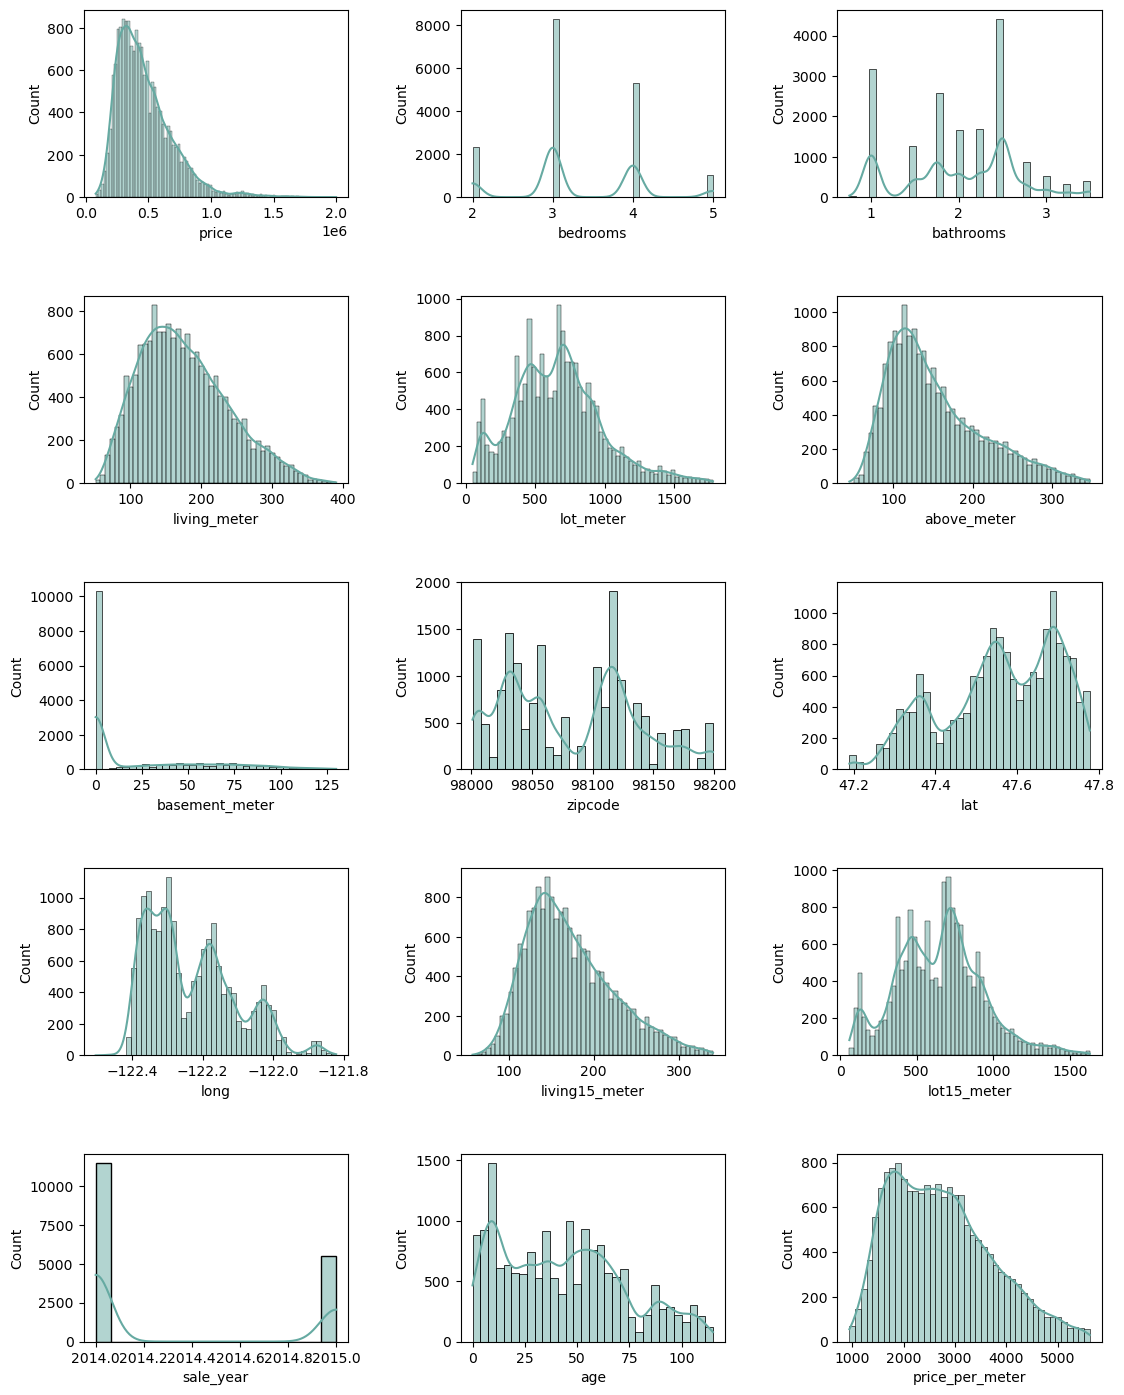

In [34]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 15))
fig.tight_layout(pad=5)

for i, num_feature in enumerate(Continuous):
    if i < 15:
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        sns.histplot(x=num_feature, kde=True, data=IQR_removal, ax=ax, color='#66aaa2')

# Remove any empty subplots if there are fewer than 14 numeric features
for i in range(15, len(Continuous)):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])
    
print('The number of rows i have removed :',(data4.shape[0] - IQR_removal.shape[0]))
print('The percentage i have removed :',round(100-(IQR_removal.shape[0] / data4.shape[0])*100,3))
plt.show()

# Outlier detection using percentile

In [35]:
min_threshold = data4.drop(['price'], axis=1).quantile(0.003, numeric_only=True)
max_threshold = data4.drop(['price'], axis=1).quantile(0.997, numeric_only=True)
min_threshold, max_threshold

percentile_removal = data4[~((data4 < min_threshold) | (data4 > max_threshold)).any(axis = 1)]

The number of rows i have removed : 984
The percentage i have removed : 4.553


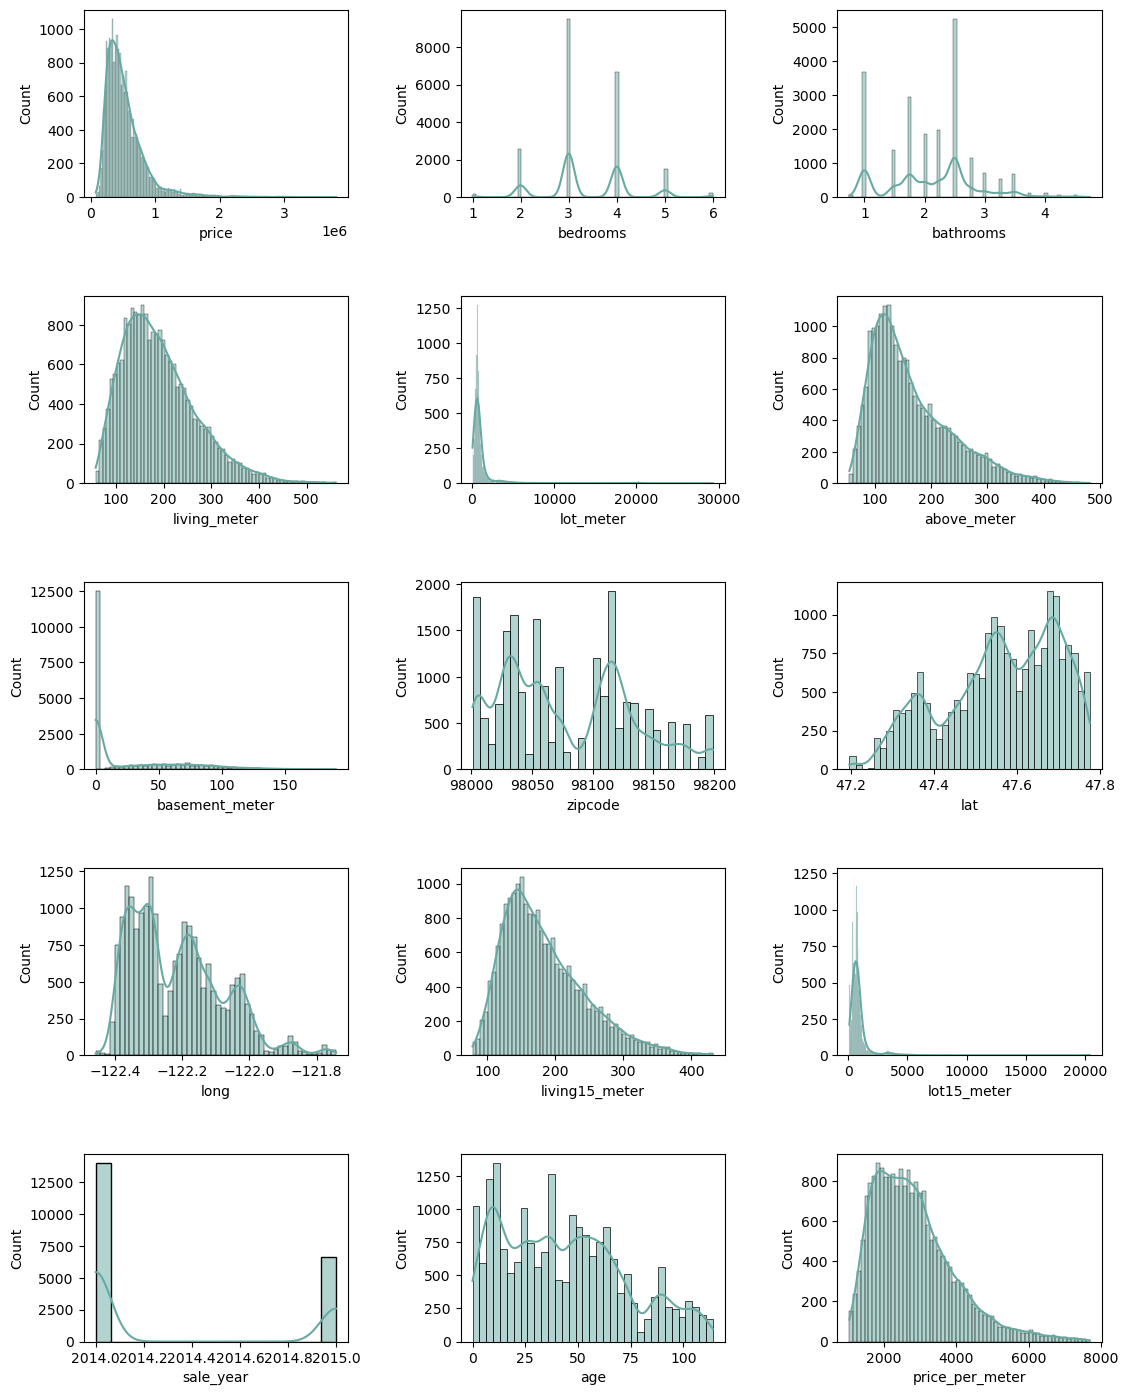

In [36]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 15))
fig.tight_layout(pad=5)

for i, num_feature in enumerate(Continuous):
    if i < 15:
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        sns.histplot(x=num_feature, kde=True, data=percentile_removal, ax=ax, color='#66aaa2')

for i in range(15, len(Continuous)):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])
    
print('The number of rows i have removed :',(data4.shape[0] - percentile_removal.shape[0]))
print('The percentage i have removed :',round(100-(percentile_removal.shape[0] / data4.shape[0])*100,3))
plt.show()

# Outlier detection using Z-Score

In [37]:
zscore = (data4 - data4.mean()) / data4.std()
zscore_removal = zscore[(zscore.abs() < 4).all(axis=1)]

The number of rows i have removed : 1845
The percentage i have removed : 8.537


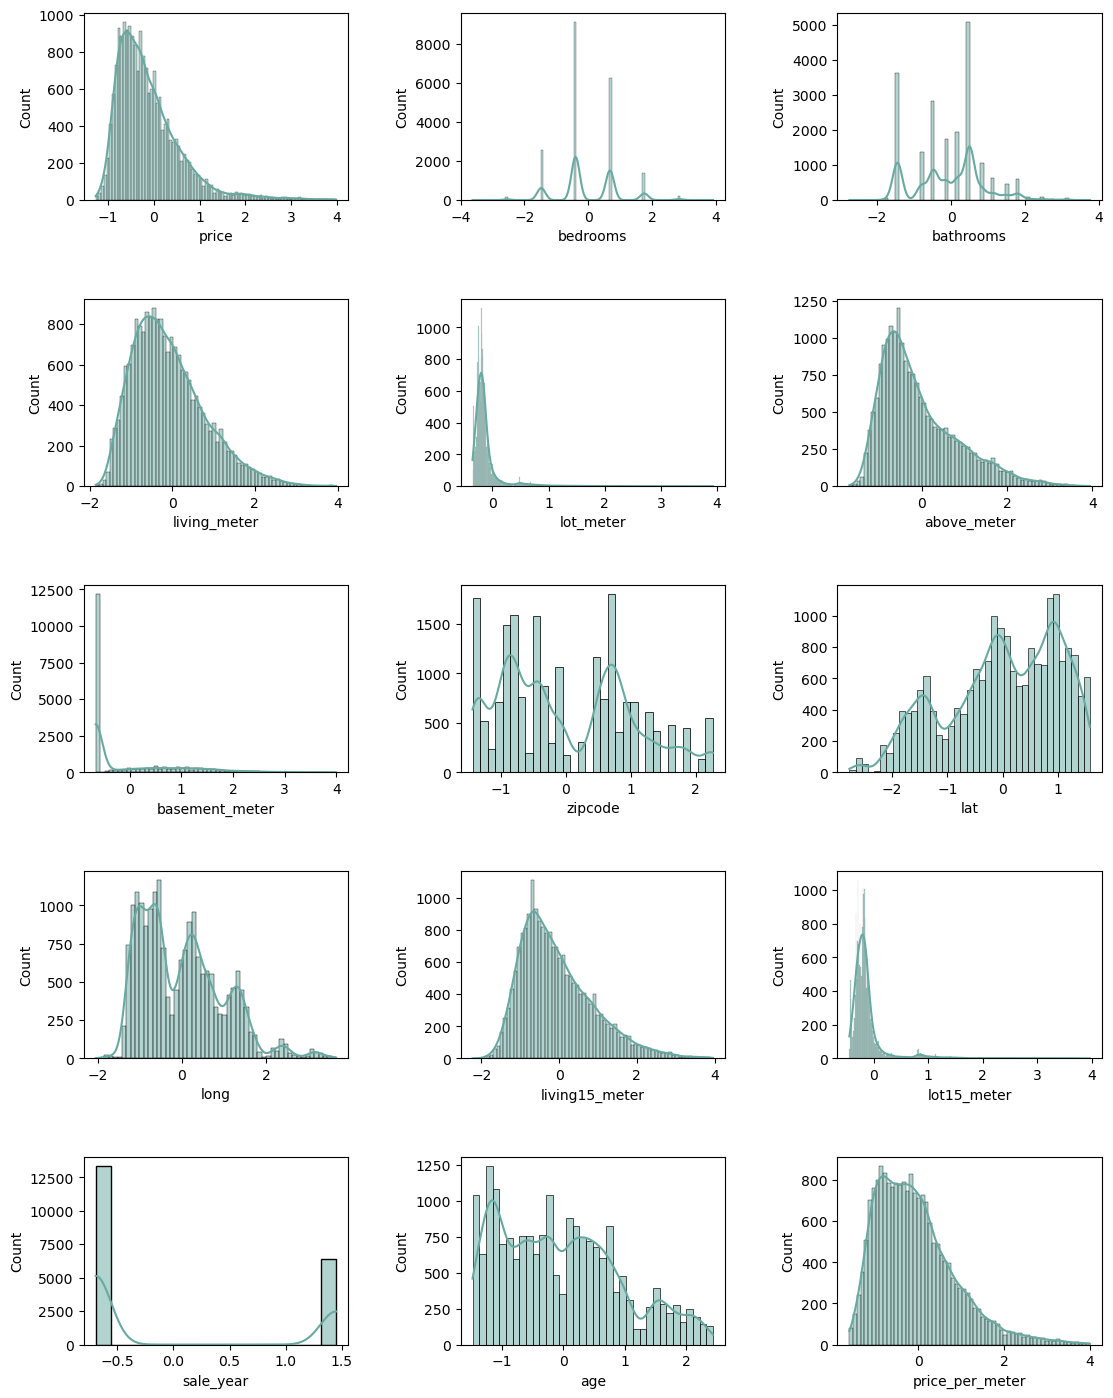

In [38]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 15))
fig.tight_layout(pad=5)

for i, num_feature in enumerate(Continuous):
    if i < 15:
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        sns.histplot(x=num_feature, kde=True, data=zscore_removal, ax=ax, color='#66aaa2')

for i in range(15, len(Continuous)):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])
    
print('The number of rows i have removed :',(data4.shape[0] - zscore_removal.shape[0]))
print('The percentage i have removed :',round(100-(zscore_removal.shape[0] / data4.shape[0])*100,3))
plt.show()

I will Keep the data as it is, I'm not using any of the above technique to remove outliers.
I just use them to detect the outliers

# Custumize Cleaning

In [39]:
data5 = data4.copy()

In [40]:
# Checking all houses with (living area / bedrooms) is less than 22 m

print("Number of houses that the ratio between the living area and the number of bedrooms is less than 25 :"
      , data5[(data5.living_meter) / (data5.bedrooms) < 22]['price'].agg('count'))

data5[(data5.living_meter) / (data5.bedrooms) < 22]

Number of houses that the ratio between the living area and the number of bedrooms is less than 25 : 12


price  bedrooms  bathrooms  living_meter  lot_meter floors  \
319    268750.0  4         1.00       74.322        815.224    1.0     
1168   290000.0  2         0.75       40.877        772.303    1.0     
4203   150000.0  3         0.75       45.522        3576.766   1.5     
5438   340000.0  3         1.00       62.245        2185.264   1.0     
5885   230000.0  3         1.00       63.174        222.967    1.0     
6400   345000.0  3         1.75       65.961        469.160    1.0     
11444  340000.0  5         1.00       104.051       838.171    1.5     
11808  225000.0  3         1.00       61.316        613.160    1.0     
12338  175000.0  6         1.00       127.277       471.947    1.5     
12339  415000.0  6         1.00       127.277       471.947    1.5     
15870  640000.0  33        1.75       150.503       557.418    1.0     
18290  397000.0  5         1.00       108.697       627.746    1.0     

      waterfront view condition grade  above_meter  basement_meter  zipcode  \
319    0          0    3         6     74.322       0.000           98166     
1168   1          3    4         5     40.877       0.000           98070     
4203   0          0    4         5     45.522       0.000           98014     
5438   0          0    4         6     62.245       0.000           98024     
5885   0          0    4         6     63.174       0.000           98144     
6400   0          0    4         6     65.961       0.000           98126     
11444  0          0    4         7     104.051      0.000           98034     
11808  0          0    4         5     61.316       0.000           98168     
12338  0          0    3         6     104.051      23.226          98106     
12339  0          0    3         6     104.051      23.226          98106     
15870  0          0    5         7     96.619       53.884          98103     
18290  0          0    4         6     74.322       34.374          98125     

           lat     long  living15_meter  lot15_meter  sale_year sale_month  \
319    47.4800 -122.336  121.703         815.224      2014       11          
1168   47.4339 -122.512  81.755          2442.327     2014       10          
4203   47.7112 -121.315  74.322          1699.846     2014       7           
5438   47.5329 -121.890  174.658         1883.144     2015       3           
5885   47.5982 -122.299  136.567         334.451      2014       10          
6400   47.5194 -122.375  83.613          469.160      2014       10          
11444  47.7296 -122.240  121.703         696.772      2014       5           
11808  47.4842 -122.330  122.632         613.160      2015       2           
12338  47.5238 -122.350  94.761          471.947      2014       6           
12339  47.5238 -122.350  94.761          471.947      2015       1           
15870  47.6878 -122.331  123.561         436.644      2014       6           
18290  47.7332 -122.304  147.716         631.183      2014       6           

       age  price_per_meter is_renovated  
319    71   3616.022174      0            
1168   71   7094.454094      0            
4203   55   3295.110057      0            
5438   47   5462.286127      0            
5885   111  3640.738278      0            
6400   64   5230.363397      0            
11444  52   3267.628375      0            
11808  75   3669.515298      0            
12338  83   1374.953841      0            
12339  84   3260.604823      0            
15870  67   4252.406929      0            
18290  70   3652.354711      0

In [41]:
# its impossible to have a 33 bedrooms in 150.503 m2!, i believe that the house number 15870 is typo in Data entry
# and the correct number of bedrooms is 3 not 33.
data5.at[15870, 'bedrooms'] = 3

In [42]:
# Remove the other data because i can't assume what's the correct data
# where the number of bedrooms does not align with the total house area.
data5 = data5[~((data5.living_meter) / (data5.bedrooms) < 22)]

In [43]:
# Each floor has larger area than the land area!

data5['is_basement'] = data5['basement_meter'].apply(lambda x: 1 if x != 0 else 0)

print("Number of houses that each floor and basement have larger area than the land area :",
      data5[(data5['living_meter'] / (data5['floors'] + data5['basement_meter'])) > data5['lot_meter']]['price'].agg('count'))

data5[(data5['living_meter'] / (data5['floors'] + data5['basement_meter'])) > data5['lot_meter']]

Number of houses that each floor and basement have larger area than the land area : 2


price  bedrooms  bathrooms  living_meter  lot_meter floors  \
13278  370000.0  3         1.00       108.697       102.658    1.0     
15743  700000.0  4         1.75       224.825       48.310     1.5     

      waterfront view condition grade  above_meter  basement_meter  zipcode  \
13278  0          0    3         7     108.697      0.0             98126     
15743  0          0    3         7     224.825      0.0             98112     

           lat     long  living15_meter  lot15_meter  sale_year sale_month  \
13278  47.5448 -122.375  128.206         129.971      2014       7           
15743  47.6209 -122.302  111.484         108.697      2014       10          

       age  price_per_meter is_renovated  is_basement  
13278  49   3403.957791      0            0            
15743  114  3113.532748      0            0

In [44]:
# Remove them
data5 = data5[~((data5['living_meter'] / (data5['floors'] + data5['basement_meter'])) > data5['lot_meter'])]
data5.drop(columns=['is_basement'], inplace=True)

In [45]:
# Make sure that the basement area and the above area is equal to the living area
data5[(abs(data5['above_meter'] + data5['basement_meter'] - data5['living_meter']) > 0.1)]['price'].agg('count')

0

In [46]:
# Houses with no bathrooms or bedrooms!
print("Number of houses that Does not have any bathroom :",
      data5[(data5['bathrooms'] == 0) | (data5['bedrooms'] == 0)]['price'].agg('count'))
data5[(data5['bathrooms'] == 0) | (data5['bedrooms'] == 0)]

Number of houses that Does not have any bathroom : 16


price  bedrooms  bathrooms  living_meter  lot_meter floors  \
875    1095000.0  0         0.00       284.655       442.590    3.5     
1149   75000.0    1         0.00       62.245        4029.853   1.0     
3119   380000.0   0         0.00       136.567       90.952     3.0     
3467   288000.0   0         1.50       132.851       153.290    3.0     
4868   228000.0   0         1.00       36.232        548.128    1.0     
5832   280000.0   1         0.00       55.742        2276.216   1.0     
6994   1295650.0  0         0.00       446.863       2602.027   2.0     
8477   339950.0   0         2.50       212.748       772.860    2.0     
8484   240000.0   0         2.50       168.154       526.667    2.0     
9773   355000.0   0         0.00       228.541       747.776    2.0     
9854   235000.0   0         0.00       136.567       445.934    2.0     
10481  484000.0   1         0.00       64.103        2159.437   1.0     
12653  320000.0   0         2.50       138.425       660.633    2.0     
14423  139950.0   0         0.00       78.410        396.603    1.0     
18379  265000.0   0         0.75       35.675        19829.588  1.0     
19452  142000.0   0         0.00       26.942        1939.350   1.0     

      waterfront view condition grade  above_meter  basement_meter  zipcode  \
875    0          2    3         7     284.655      0.0             98102     
1149   0          0    3         3     62.245       0.0             98022     
3119   0          2    3         8     136.567      0.0             98133     
3467   0          0    3         7     132.851      0.0             98125     
4868   0          0    2         4     36.232       0.0             98118     
5832   0          0    2         3     55.742       0.0             98045     
6994   0          0    3         12    446.863      0.0             98053     
8477   0          0    3         8     212.748      0.0             98042     
8484   0          0    3         7     168.154      0.0             98038     
9773   0          0    3         8     228.541      0.0             98031     
9854   0          0    3         7     136.567      0.0             98065     
10481  0          0    4         7     64.103       0.0             98053     
12653  0          0    3         7     138.425      0.0             98065     
14423  0          0    4         7     78.410       0.0             98001     
18379  0          0    3         4     35.675       0.0             98070     
19452  0          0    1         1     26.942       0.0             98024     

           lat     long  living15_meter  lot15_meter  sale_year sale_month  \
875    47.6362 -122.322  219.251         371.612      2014       6           
1149   47.2638 -121.906  107.767         3983.866     2015       2           
3119   47.7145 -122.356  136.567         129.971      2015       2           
3467   47.7222 -122.290  132.851         153.290      2014       8           
4868   47.5260 -122.261  201.600         557.418      2014       10          
5832   47.5316 -121.749  91.974          2094.870     2014       11          
6994   47.6642 -122.069  440.360         3257.272     2014       6           
8477   47.3473 -122.151  232.258         812.994      2014       11          
8484   47.3493 -122.053  168.154         528.154      2014       9           
9773   47.4095 -122.168  234.116         747.869      2015       4           
9854   47.5265 -121.828  98.477          668.902      2014       12          
10481  47.6429 -121.955  157.006         1792.099     2014       9           
12653  47.5261 -121.826  139.354         434.322      2015       2           
14423  47.2781 -122.250  128.206         891.869      2015       4           
18379  47.4177 -122.491  178.374         20841.952    2014       10          
19452  47.5308 -121.888  150.503         2122.834     2014       9           

       age  price_per_meter is_renovated  
875    24   3846.761870      0            
1149   49   

In [47]:
# Remove any house that doesnt have bedroom or bathroom!
data5 = data5[~((data5['bathrooms'] == 0) | (data5['bedrooms'] == 0))]

In [48]:
data5[(data5['price'] > 4000000)]['price'].agg('count')

11

In [49]:
data5 = data5[~(data5['price'] > 4000000)]

In [50]:
data5.shape

(21573, 22)

In [51]:
print("Number of the removed rows:",data4.shape[0] - data5.shape[0])

Number of the removed rows: 40


In [52]:
# Every house has more than 8 bedrooms, (9,10,11) they are 10 houses.
data5[(data5['bedrooms'] > 8)]

price  bedrooms  bathrooms  living_meter  lot_meter floors  \
4096   599999.0   9         4.50       355.818       649.206    2.5     
4235   700000.0   9         3.00       341.883       408.773    2.0     
6079   1280000.0  9         4.50       339.096       464.515    2.0     
8546   450000.0   9         7.50       376.257       604.241    2.0     
8757   520000.0   11        3.00       278.709       460.799    2.0     
13314  1148000.0  10        5.25       426.425       1014.501   1.0     
15161  650000.0   10        2.00       335.380       1106.846   2.0     
16844  1400000.0  9         4.00       429.212       511.710    2.5     
18443  934000.0   9         3.00       261.986       416.205    2.0     
19254  660000.0   10        3.00       271.277       347.922    2.0     

      waterfront view condition grade  above_meter  basement_meter  zipcode  \
4096   0          0    3         7     227.612      128.206         98103     
4235   0          0    3         7     262.915      78.968          98102     
6079   0          0    3         8     235.045      104.051         98105     
8546   0          0    3         7     376.257      0.000           98144     
8757   0          0    3         7     222.967      55.742          98106     
13314  0          2    3         9     232.258      194.167         98004     
15161  0          0    4         7     279.638      55.742          98006     
16844  0          0    3         11    359.535      69.677          98105     
18443  0          0    3         7     174.658      87.329          98105     
19254  0          0    4         7     172.800      98.477          98105     

           lat     long  living15_meter  lot15_meter  sale_year sale_month  \
4096   47.6927 -122.338  135.638         584.453      2014       5           
4235   47.6374 -122.324  182.090         227.612      2015       1           
6079   47.6604 -122.289  233.187         464.515      2014       8           
8546   47.5923 -122.301  134.524         359.163      2014       8           
8757   47.5560 -122.363  131.922         460.799      2014       8           
13314  47.5861 -122.113  253.625         966.191      2014       8           
15161  47.5705 -122.175  189.522         1106.846     2014       10          
16844  47.6684 -122.309  251.767         401.341      2015       3           
18443  47.6654 -122.307  228.541         408.773      2015       3           
19254  47.6635 -122.320  168.154         347.922      2014       12          

       age  price_per_meter is_renovated  
4096   76   1686.252522      0            
4235   107  2047.484081      0            
6079   99   3774.742256      1            
8546   18   1195.991038      0            
8757   96   1865.745276      1            
13314  6    2692.149851      0            
15161  56   1938.100066      0            
16844  100  3261.791376      0            
18443  97   3565.075996      0            
19254  101  2432.937551      0

In [53]:
data6 = data5.copy()

In [54]:
data6.head()

price  bedrooms  bathrooms  living_meter  lot_meter floors waterfront  \
0  221900.0  3         1.00       109.626       524.902    1.0    0           
1  538000.0  3         2.25       238.761       672.804    2.0    0           
2  180000.0  2         1.00       71.535        929.030    1.0    0           
3  604000.0  4         3.00       182.090       464.515    1.0    0           
4  510000.0  3         2.00       156.077       750.656    1.0    0           

  view condition grade  above_meter  basement_meter  zipcode      lat  \
0  0    3         7     109.626      0.000           98178    47.5112   
1  0    3         7     201.600      37.161          98125    47.7210   
2  0    3         6     71.535       0.000           98028    47.7379   
3  0    5         7     97.548       84.542          98136    47.5208   
4  0    3         8     156.077      0.000           98074    47.6168   

      long  living15_meter  lot15_meter  sale_year sale_month  age  \
0 -122.257  124.490         524.902      2014       10         59    
1 -122.319  157.006         709.686      2014       12         63    
2 -122.233  252.696         748.984      2015       2          82    
3 -122.393  126.348         464.515      2014       12         49    
4 -122.045  167.225         697.051      2015       2          28    

   price_per_meter is_renovated  
0  2024.154854      0            
1  2253.299324      1            
2  2516.250786      0            
3  3317.041024      0            
4  3267.617907      0

# Final Visualization after cleaning

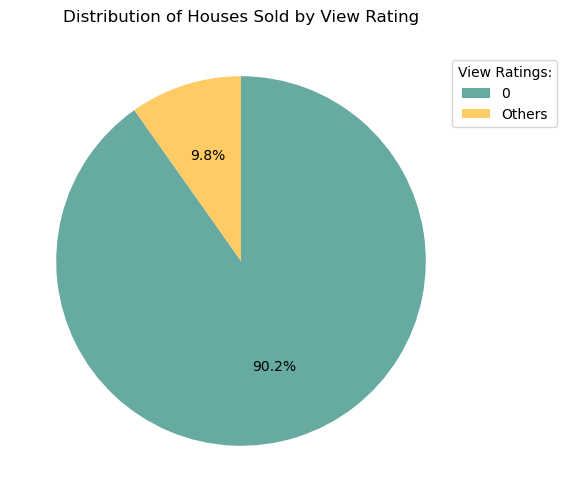

In [55]:
category_counts = data6['view'].value_counts()

top_n = 1 
others_count = category_counts[top_n:].sum()
others_series = pd.Series({'Others': others_count})
category_counts = category_counts[:top_n]
category_counts = pd.concat([category_counts, others_series])


plt.figure(figsize=(8, 6))
plt.pie(category_counts, autopct='%1.1f%%',
        colors=sns.color_palette(['#66aaa2','#ffcb64']), startangle=90, counterclock=False)
legend_labels =['0','Others']
plt.legend(legend_labels,title = "View Ratings:",loc='upper right', bbox_to_anchor=(1.2, 0.95))
plt.title('Distribution of Houses Sold by View Rating')
# plt.savefig('View_pie.png')
plt.show()

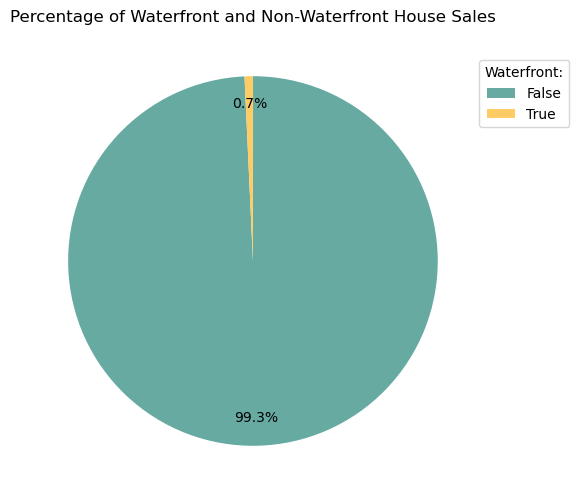

In [56]:
category_counts = data6['waterfront'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(category_counts, autopct='%1.1f%%',
        colors=sns.color_palette(['#66aaa2','#ffcb64']), startangle=90, counterclock=False
       ,pctdistance=0.85)
legend_labels =['False','True']
plt.legend(legend_labels,title = "Waterfront:",loc='upper right', bbox_to_anchor=(1.2, 0.95))
plt.title('Percentage of Waterfront and Non-Waterfront House Sales')
# plt.savefig('Waterfront_pie.png')
plt.show()

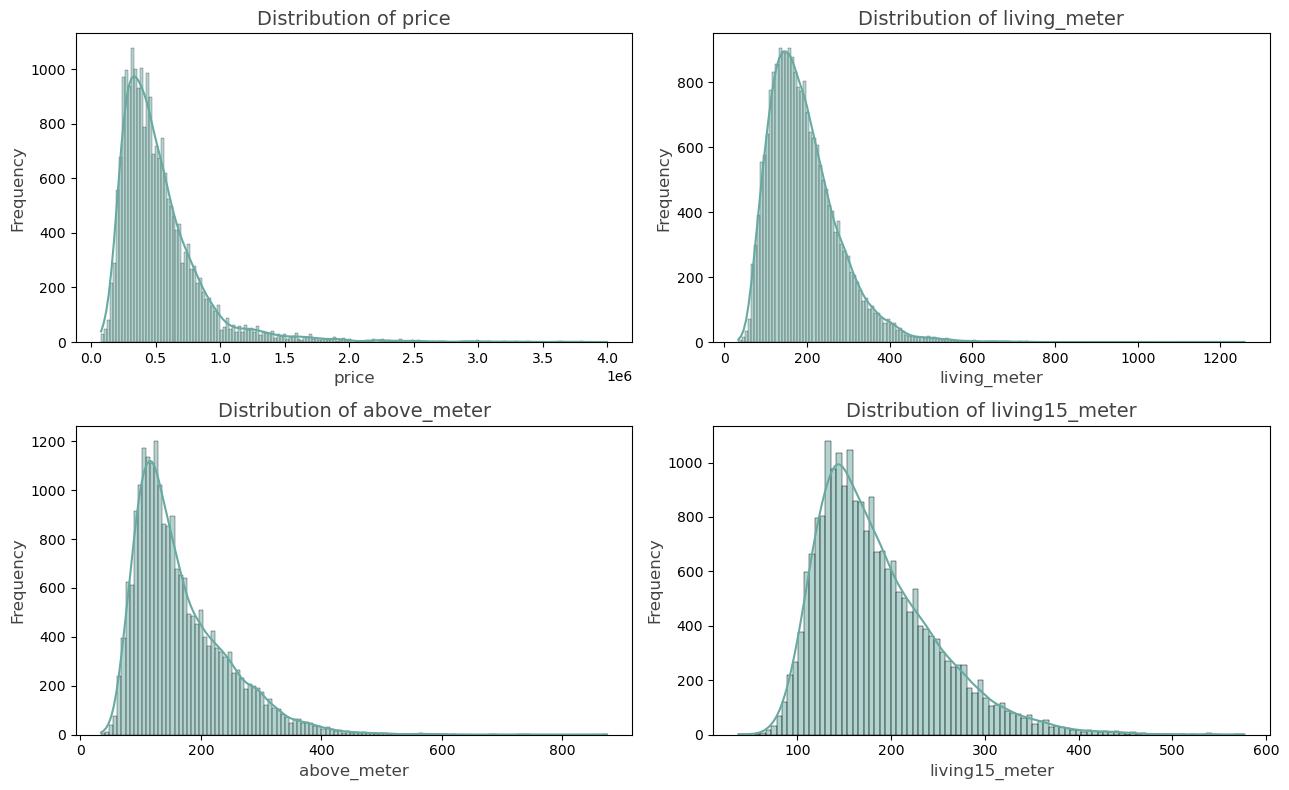

In [57]:
columns_to_plot = ['price', 'living_meter', 'above_meter', 'living15_meter']

plt.figure(figsize=(13, 8))

for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = plt.subplot(2, 2, i + 1)
    sns.histplot(x=column, kde=True, data=data6, ax=ax, color='#66aaa2')
    
    plt.xlabel(column, color='#434343', fontsize=12)
    plt.ylabel("Frequency", color='#434343', fontsize=12)
    plt.title(f"Distribution of {column}", color='#434343', fontsize=14)

plt.subplots_adjust(hspace=0.4)    
plt.savefig('Cont.png')
plt.tight_layout()
plt.show()

In [58]:
price_df = pd.DataFrame({'The Number of bedrooms' : sorted(data6['bedrooms'].unique()),
                                  'Price' : data6.groupby('bedrooms')['price'].mean()})

fig = px.area(price_df, x='The Number of bedrooms',  y='Price', color_discrete_sequence=['#66aaa2'],
             title='The AVG House Price for each number of bedrooms')

fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showgrid=True, gridcolor='white')
fig.update_yaxes(showgrid=True, gridcolor='#9ad7d2')

# plt.savefig('Price_bedroom.png')
fig.show()

In [59]:
# 10 Houses have more than 8 bedrooms
data6[(data6['bedrooms'] == 9) | (data6['bedrooms'] == 10) | (data6['bedrooms'] == 11)]['price'].agg('count')

10

In [60]:
price_df = pd.DataFrame({'The Number of bathrooms' : sorted(data6['bathrooms'].unique()),
                                  'Price' : data6.groupby('bathrooms')['price'].mean()})

fig = px.area(price_df, x='The Number of bathrooms',  y='Price', color_discrete_sequence=['#66aaa2'],
             title='The AVG House Price for each number of bathrooms')

fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showgrid=True, gridcolor='white')
fig.update_yaxes(showgrid=True, gridcolor='#9ad7d2')

# plt.savefig('Price_bathrooms.png')
fig.show()

In [61]:
# 5 houses only have more than 6.25 bathrooms
data6[(data6['bathrooms'] > 6.25)]['price'].agg('count')

5

In [62]:
price_df = pd.DataFrame({'View Values' : sorted(data6['view'].unique()),
                                  'Price' : data6.groupby('view')['price'].mean()})

fig = px.bar(price_df, x='View Values',  y='Price', color_discrete_sequence=['#66aaa2'],
             title='The AVG House Price for each View Values')

fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showgrid=True, gridcolor='white')
fig.update_yaxes(showgrid=True, gridcolor='#9ad7d2')

# plt.savefig('Price_view.png')
fig.show()

In [63]:
price_df = pd.DataFrame({'Grade Values' : sorted(data5['grade'].unique()),
                                  'Price' : data5.groupby('grade')['price'].mean()})

fig = px.bar(price_df, x='Grade Values',  y='Price', color_discrete_sequence=['#66aaa2'],
             title='The AVG House Price for each Grade Values')

fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showgrid=True, gridcolor='white')
fig.update_yaxes(showgrid=True, gridcolor='#9ad7d2')

# plt.savefig('Price_Grade.png')
fig.show()

In [64]:
price_df = pd.DataFrame({'Grade Values' : sorted(data5['grade'].unique()),
                                  'age' : data5.groupby('grade')['age'].mean()})

fig = px.bar(price_df, x='Grade Values',  y='age', color_discrete_sequence=['#66aaa2'],
             title='The AVG House age for each Grade Values')

fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showgrid=True, gridcolor='white')
fig.update_yaxes(showgrid=True, gridcolor='#9ad7d2')

# plt.savefig('Price_Grade.png')
fig.show()

In [65]:
price_df = pd.DataFrame({'floors' : sorted(data5['floors'].unique()),
                                  'age' : data5.groupby('floors')['age'].mean()})

fig = px.bar(price_df, x='floors',  y='age', color_discrete_sequence=['#66aaa2'],
             title='The AVG House age for each floors Values')

fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showgrid=True, gridcolor='white')
fig.update_yaxes(showgrid=True, gridcolor='#9ad7d2')

# plt.savefig('Price_Grade.png')
fig.show()

In [66]:
price_df = pd.DataFrame({'living_meter' : sorted(data5['living_meter'].unique()),
                                  'Price' : data5.groupby('living_meter')['price'].mean()})

fig = px.scatter(price_df, x='living_meter',  y='Price', color_discrete_sequence=['#66aaa2'],
             title='Relationship Between Living Area Size and Average House Prices')

fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showgrid=True, gridcolor='white')
fig.update_yaxes(showgrid=True, gridcolor='#9ad7d2')

# plt.savefig('Price_living.png')
fig.show()

In [67]:
price_df = pd.DataFrame({'above_meter' : sorted(data5['above_meter'].unique()),
                                  'Price' : data5.groupby('above_meter')['price'].mean()})

fig = px.scatter(price_df, x='above_meter',  y='Price', color_discrete_sequence=['#66aaa2'],
             title='Relationship Between Above the Ground Area Size and Average House Prices')

fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showgrid=True, gridcolor='white')
fig.update_yaxes(showgrid=True, gridcolor='#9ad7d2')

# plt.savefig('Price_living.png')
fig.show()

In [68]:
price_df = pd.DataFrame({'Condition Values' : sorted(data5['condition'].unique()),
                                  'Price' : data5.groupby('condition')['price'].mean()})

fig = px.bar(price_df, x='Condition Values',  y='Price', color_discrete_sequence=['#66aaa2'],
             title='The AVG House Price for each Condition Values')
fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showgrid=True, gridcolor='white')
fig.update_yaxes(showgrid=True, gridcolor='#9ad7d2')

# plt.savefig('Price_grade.png')
fig.show()

In [69]:
price_df = pd.DataFrame({'Floors Values' : sorted(data6['floors'].unique()),
                                  'Price' : data6.groupby('floors')['price'].mean()})

fig = px.bar(price_df, x='Floors Values',  y='Price', color_discrete_sequence=['#66aaa2'],
             title='The AVG House Price for each Floors Values')


fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showgrid=True, gridcolor='white')
fig.update_yaxes(showgrid=True, gridcolor='#9ad7d2')


# plt.savefig('Price_Floors.png')
fig.show()

In [70]:
price_df = pd.DataFrame({'Overlooking Waterfront' : sorted(data5['waterfront'].unique()),
                                  'Price' : data5.groupby('waterfront')['price'].mean()})

fig = px.bar(price_df, x='Overlooking Waterfront',  y='Price', color_discrete_sequence=['#66aaa2'],
             title='The AVG House Price for Overlooking Waterfront and Not')

fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showgrid=True, gridcolor='white')
fig.update_yaxes(showgrid=True, gridcolor='#9ad7d2')

# plt.savefig('Price_Waterfront.png')
fig.show()

In [71]:
price_df = pd.DataFrame({'Age Values' : sorted(data5['age'].unique()),
                                  'Price' : data5.groupby('age')['price'].mean()})

fig = px.scatter(price_df, x='Age Values',  y='Price', color_discrete_sequence=['#66aaa2'],
             title='The AVG House Price for each Age Values')

fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showgrid=True, gridcolor='white')
fig.update_yaxes(showgrid=True, gridcolor='#9ad7d2')

# plt.savefig('Price_Age.png')
fig.show()

In [72]:
price_df = pd.DataFrame({'Condition' : sorted(data5['condition'].unique()),
                                  'Age Values' : data5.groupby('condition')['age'].mean()})

fig = px.bar(price_df, x='Condition',  y='Age Values', color_discrete_sequence=['#66aaa2'],
             title='The AVG House Price for each Age Values')

fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showgrid=True, gridcolor='white')
fig.update_yaxes(showgrid=True, gridcolor='#9ad7d2')
# plt.savefig('Price_Age.png')
fig.show()

In [73]:
price_df = pd.DataFrame({'Condition' : sorted(data5['condition'].unique()),
                                  'Grade Values' : data5.groupby('condition')['grade'].mean()})

fig = px.bar(price_df, x='Condition',  y='Grade Values', color_discrete_sequence=['#66aaa2'],
             title='The AVG House Grade for each Age Condition')

fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showgrid=True, gridcolor='white')
fig.update_yaxes(showgrid=True, gridcolor='#9ad7d2')

# plt.savefig('Price_Age.png')
fig.show()

In [74]:
price_df = pd.DataFrame({'Overlooking Waterfront' : sorted(data5['waterfront'].unique()),
                                  'View' : data5.groupby('waterfront')['view'].mean()})

fig = px.bar(price_df, x='Overlooking Waterfront',  y='View', 
             color_discrete_sequence=['#66aaa2'],
             title='The AVG view rating for Overlooking Waterfront and Not')

fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showgrid=True, gridcolor='white')
fig.update_yaxes(showgrid=True, gridcolor='#9ad7d2')

# Save the Plotly figure
# pio.write_image(fig, 'Hypothesis1.png')

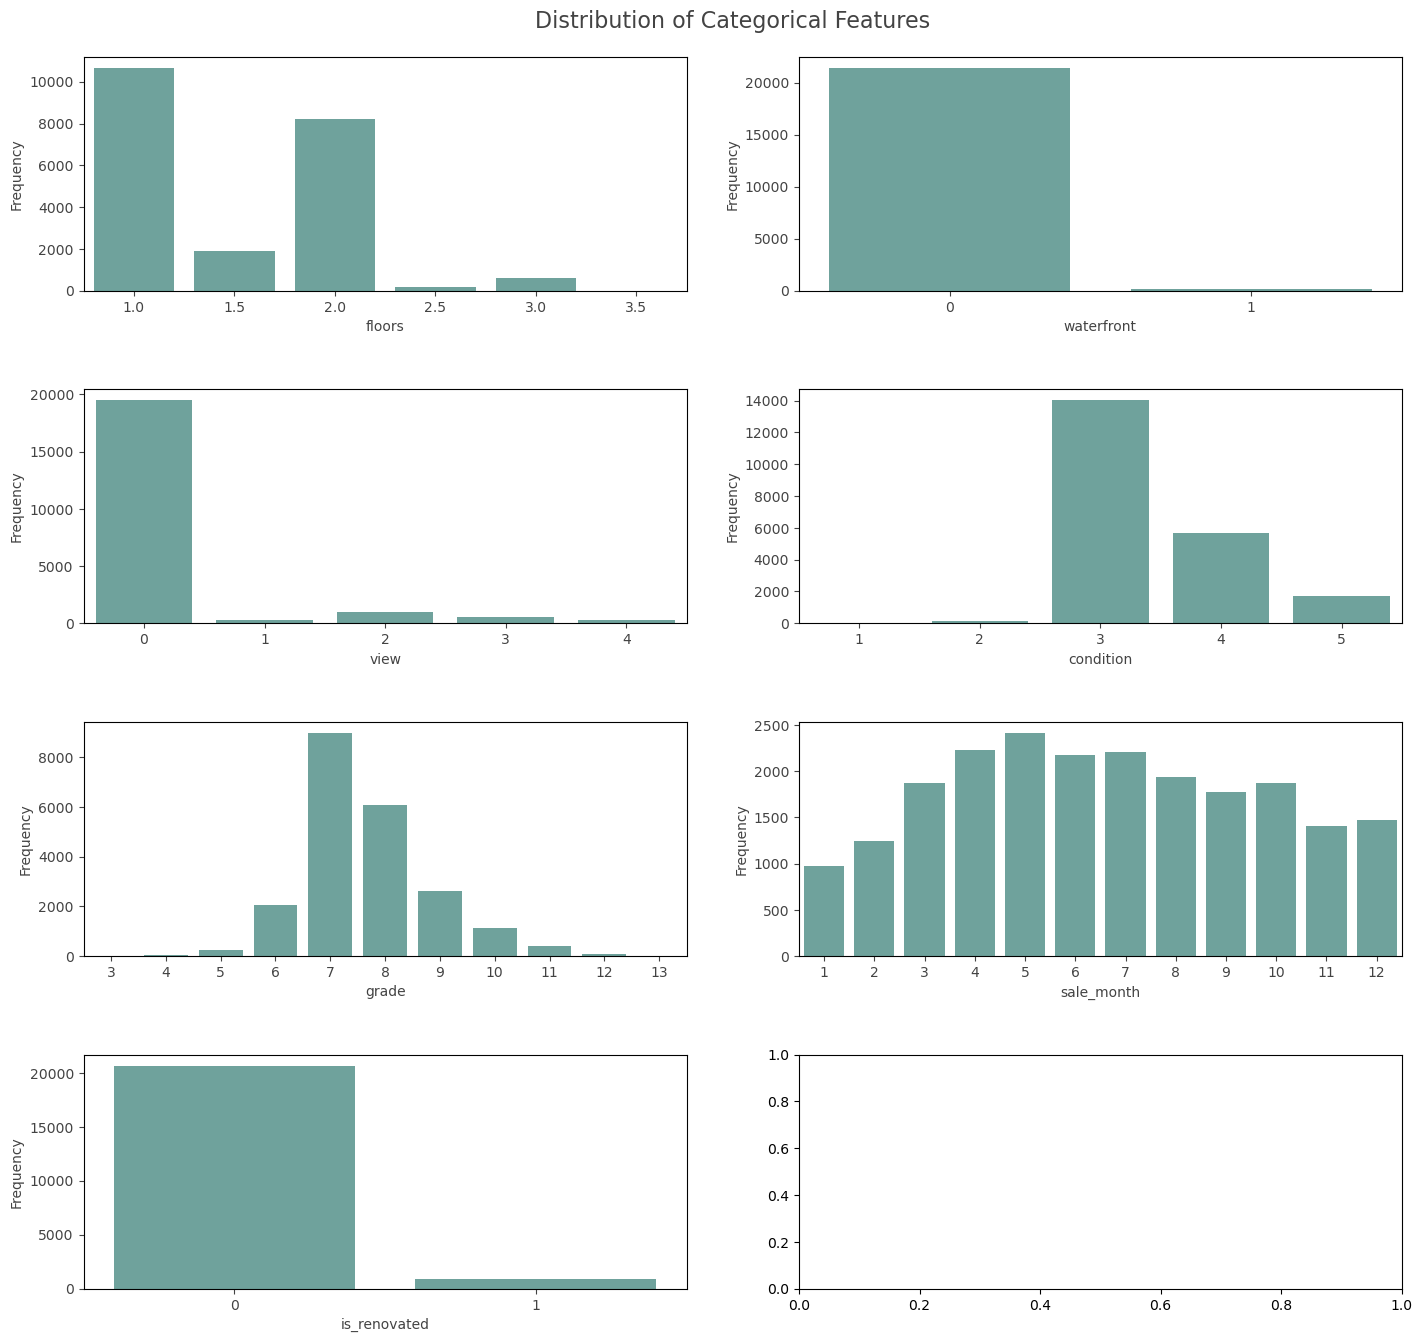

In [75]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 14))
fig.tight_layout(pad=5)

for i, num_feature in enumerate(Categorical):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(x=num_feature, data=data6, color="#66aaa2", ax=ax)
    ax.set_xlabel(num_feature, color='#434343') 
    ax.set_ylabel('Frequency', color='#434343') 
    ax.tick_params(axis='x', colors='#434343')   
    ax.tick_params(axis='y', colors='#434343')   

plt.suptitle('Distribution of Categorical Features', fontsize=16, color='#434343')
# plt.savefig('Price_Age.png')
plt.show()

In [76]:
data6.corr(numeric_only=True)

price  bedrooms  bathrooms  living_meter  lot_meter  \
price            1.000000  0.318358  0.521216   0.694563      0.092019    
bedrooms         0.318358  1.000000  0.527669   0.595275      0.033402    
bathrooms        0.521216  0.527669  1.000000   0.752516      0.088106    
living_meter     0.694563  0.595275  0.752516   1.000000      0.174633    
lot_meter        0.092019  0.033402  0.088106   0.174633      1.000000    
above_meter      0.598896  0.492178  0.682704   0.874536      0.184769    
basement_meter   0.312746  0.307385  0.275763   0.427398      0.014896    
zipcode         -0.051463 -0.158564 -0.204779  -0.200183     -0.129444    
lat              0.319725 -0.012302  0.023418   0.051200     -0.085685    
long             0.024563  0.137488  0.227302   0.245740      0.230287    
living15_meter   0.596926  0.403686  0.567590   0.758162      0.144584    
lot15_meter      0.084670  0.031725  0.088007   0.185766      0.718196    
sale_year        0.005157 -0.009081 -0.026610  -0.028831      0.005662    
age             -0.054155 -0.161332 -0.509960  -0.321759     -0.052675    
price_per_meter  0.562295 -0.217412 -0.099193  -0.105104     -0.035539    

                 above_meter  basement_meter   zipcode       lat      long  \
price            0.598896     0.312746       -0.051463  0.319725  0.024563   
bedrooms         0.492178     0.307385       -0.158564 -0.012302  0.137488   
bathrooms        0.682704     0.275763       -0.204779  0.023418  0.227302   
living_meter     0.874536     0.427398       -0.200183  0.051200  0.245740   
lot_meter        0.184769     0.014896       -0.129444 -0.085685  0.230287   
above_meter      1.000000    -0.064659       -0.262140 -0.002747  0.349239   
basement_meter  -0.064659     1.000000        0.076764  0.110477 -0.145391   
zipcode         -0.262140     0.076764        1.000000  0.267164 -0.564531   
lat             -0.002747     0.110477        0.267164  1.000000 -0.135945   
long             0.349239    -0.145391       -0.564531 -0.135945  1.000000   
living15_meter   0.731519     0.196379       -0.278787  0.048228  0.337068   
lot15_meter      0.195848     0.017152       -0.147133 -0.086241  0.255820   
sale_year       -0.023491    -0.015535        0.001463 -0.028773  0.000141   
age             -0.427215     0.134327        0.347000  0.148163 -0.410444   
price_per_meter -0.098890    -0.031922        0.174626  0.473700 -0.237399   

                 living15_meter  lot15_meter  sale_year       age  \
price            0.596926        0.084670     0.005157  -0.054155   
bedrooms         0.403686        0.031725    -0.009081  -0.161332   
bathrooms        0.567590        0.088007    -0.026610  -0.509960   
living_meter     0.758162        0.185766    -0.028831  -0.321759   
lot_meter        0.144584        0.718196     0.005662  -0.052675   
above_meter      0.731519        0.195848    -0.023491  -0.427215   
basement_meter   0.196379        0.017152    -0.015535   0.134327   
zipcode         -0.278787       -0.147133     0.001463   0.347000   
lat              0.048228       -0.086241    -0.028773   0.148163   
long             0.337068        0.255820     0.000141  -0.410444   
living15_meter   1.000000        0.183397    -0.021942  -0.326400   
lot15_meter      0.183397        1.000000     0.000147  -0.070549   
sale_year       -0.021942        0.000147     1.000000   0.012628   
age             -0.326400       -0.070549     0.012628   1.000000   
price_per_meter  0.034440       -0.060053     0.046639   0.292662   

                 price_per_meter  
price            0.562295         
bedrooms        -0.217412         
bathrooms       -0.099193         
living_meter    -0.105104         
lot_meter       -0.035539         
above_meter     -0.098890         
basement_meter  -0.031922         
zipcode          0.174626         
lat              0.473700         
long            -0.237399         
living15_meter   0.034440         
lot15_meter     -0.060053         
sale_year 

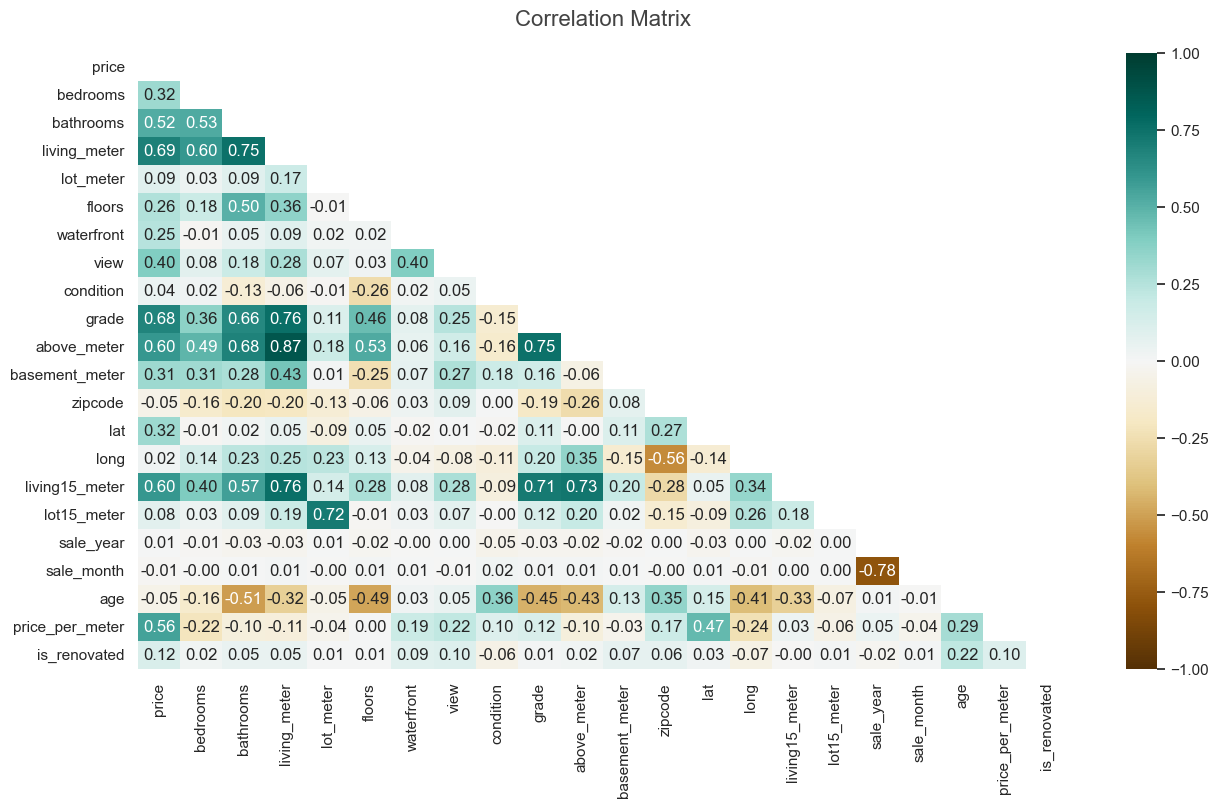

In [77]:
heat_corr = data6.astype(float)

mask = np.triu(np.ones_like(heat_corr.corr('pearson'), dtype=bool))

plt.figure(figsize=(15, 8))
sns.set_theme(style="white", font_scale=1)

sns.heatmap(heat_corr.corr('pearson'), cmap="BrBG", mask=mask, vmin=-1, vmax=1, annot=True, fmt=".2f")

plt.title("Correlation Matrix", fontsize=16, pad=20, color="#434343")
# plt.savefig('heat_map.png')

plt.show()

## Plot features with the location

<Axes: xlabel='lat', ylabel='long'>

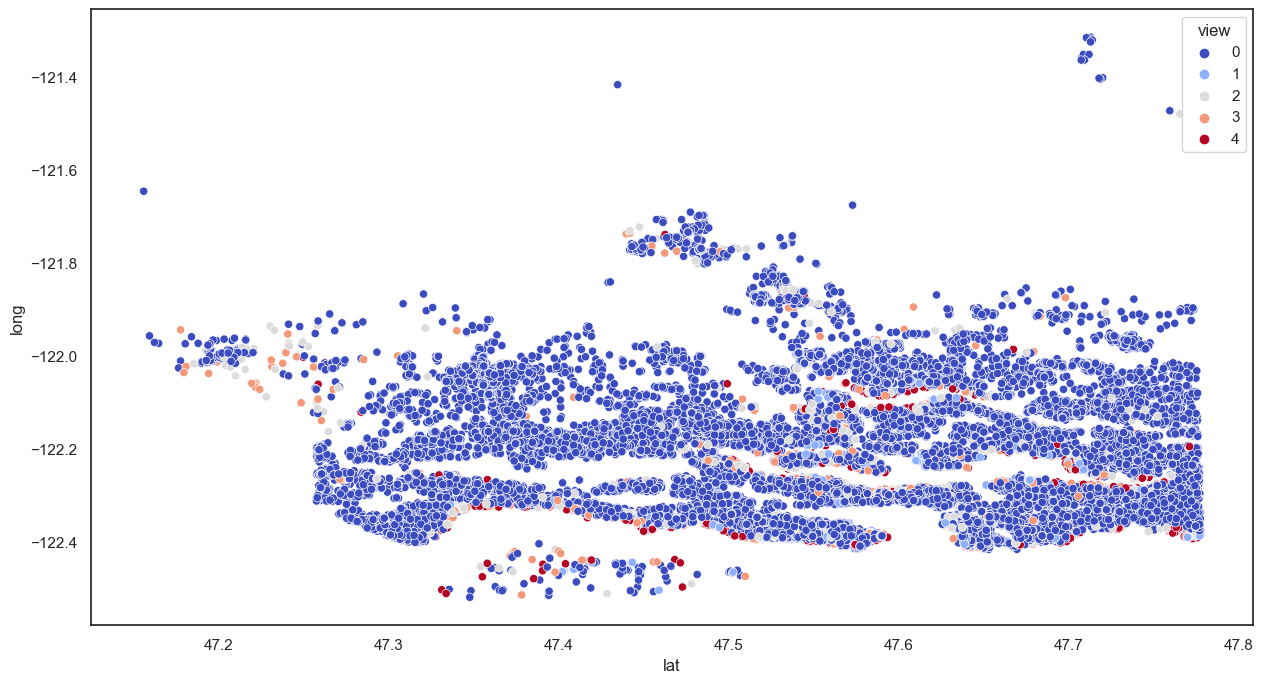

In [78]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='lat',y='long',data=data6,hue='view',palette='coolwarm')

<Axes: xlabel='lat', ylabel='long'>

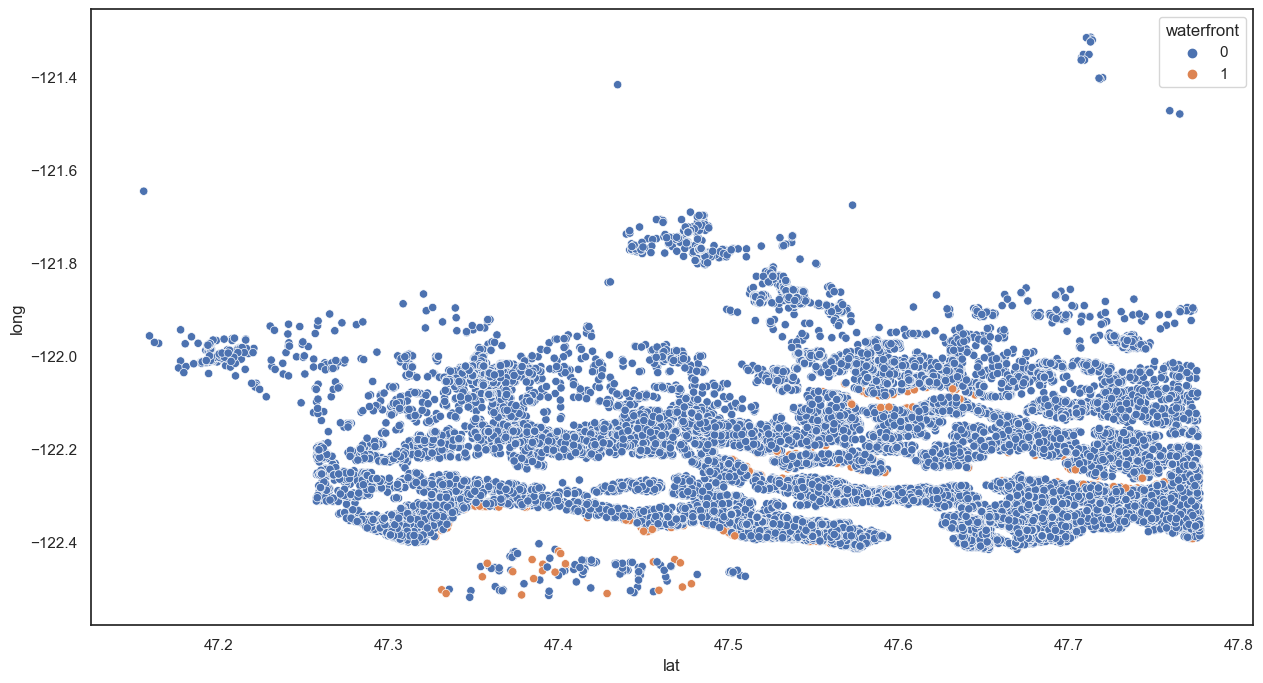

In [79]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='lat',y='long',data=data6,hue='waterfront',color='BrBG')

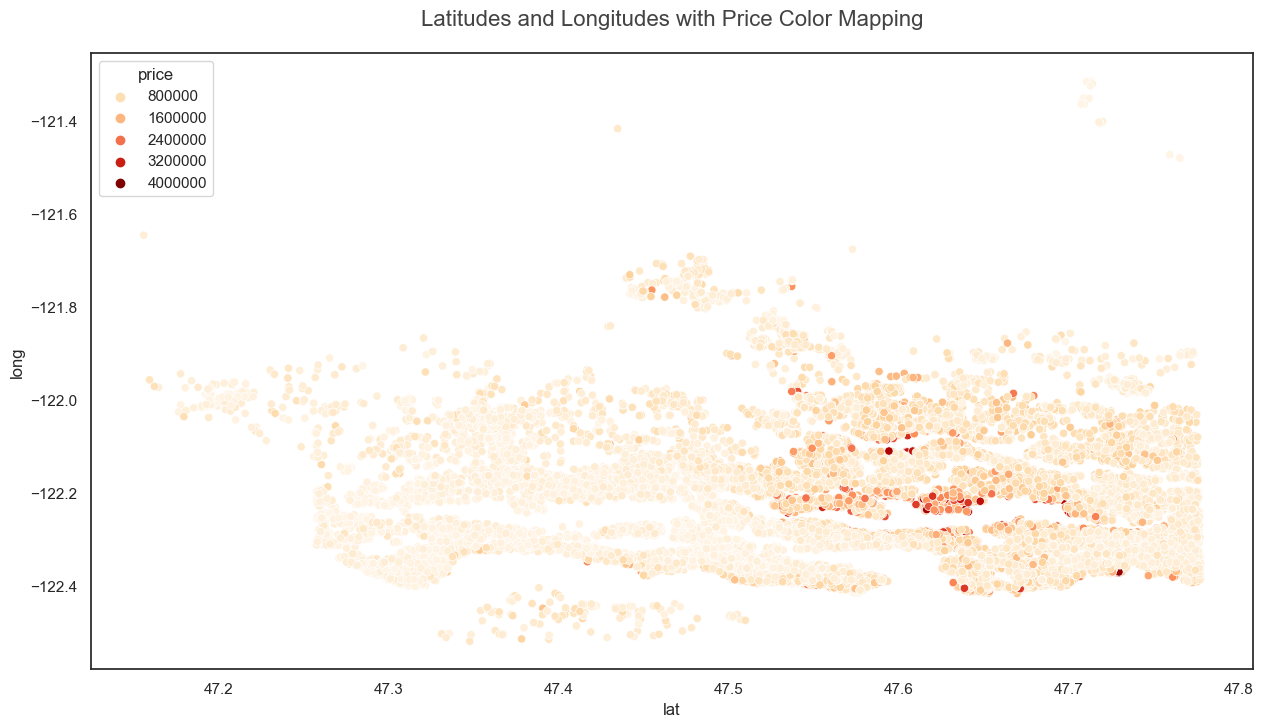

In [80]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='lat',y='long',data=data6, hue='price', palette='OrRd')
plt.title('Latitudes and Longitudes with Price Color Mapping', fontsize=16, pad=20, color="#434343")
plt.show()

as we can see in the above 'price heatmap' of the house locations, the most expensive houses are concentrated on a specific region, which means that the location can provide valuable information.

<Axes: xlabel='lat', ylabel='long'>

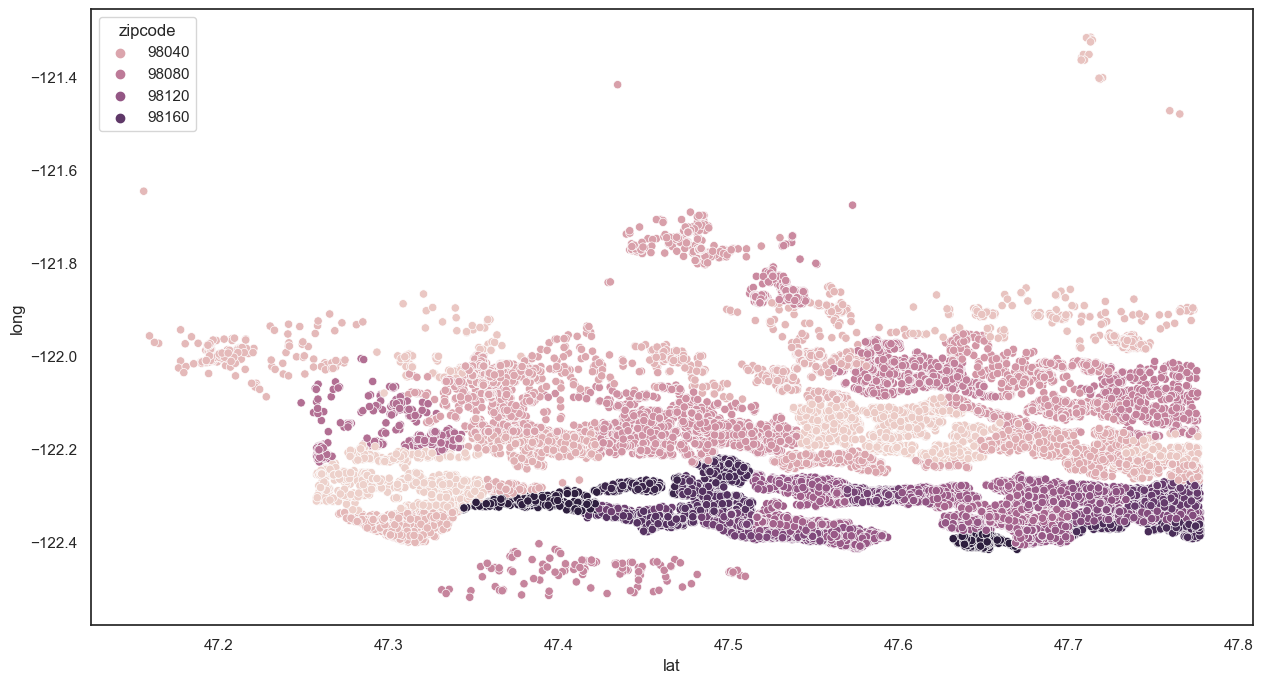

In [81]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='lat',y='long',data=data6, hue='zipcode',color='BrBG')

# Hypothesis Test

- Houses with waterfront have the same average view rating as houses without waterfront??

In [82]:
# Print the null and alternative hypothesis
print("Null Hypothesis (H0): Houses with waterfront have the same average view rating as houses without waterfront.")
print("Alternative Hypothesis (H1): Houses with waterfront have a higher average view rating than houses without waterfront.")

Null Hypothesis (H0): Houses with waterfront have the same average view rating as houses without waterfront.
Alternative Hypothesis (H1): Houses with waterfront have a higher average view rating than houses without waterfront.


In [83]:
view_test = data6.copy()
view_test['view'] = view_test['view'].astype(int)
view_test['waterfront'] = view_test['waterfront'].astype(int)

# Separate data into two groups
with_waterfront = view_test[view_test['waterfront'] == 1]['view']
without_waterfront = view_test[view_test['waterfront'] == 0]['view']

# Perform a two-sample t-test to compare the means of the two groups
t_statistic, p_value = stats.ttest_ind(with_waterfront, without_waterfront, alternative='greater')

print("Z Score:", t_statistic)
print("P value:", p_value)

alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: Houses with waterfront have a higher average view rating.")
else:
    print("Fail to reject the null hypothesis: There is no evidence that houses with waterfront have a higher average view rating.")


Z Score: 63.59746321511894
P value: 0.0
Reject the null hypothesis: Houses with waterfront have a higher average view rating.


In [84]:
# Print the null and alternative hypothesis
print("Null Hypothesis (H0): Houses with a higher than or equal grade rating 9 have, on average, the same price as houses with a lower grade rating.")
print("Alternative Hypothesis (H1): Houses with a higher or equal grade rating have, on average, a higher price than houses with a lower grade rating.")

Null Hypothesis (H0): Houses with a higher than or equal grade rating 9 have, on average, the same price as houses with a lower grade rating.
Alternative Hypothesis (H1): Houses with a higher or equal grade rating have, on average, a higher price than houses with a lower grade rating.


In [85]:
grade_test = data6.copy()
grade_test['grade'] = grade_test['grade'].astype(int)

# Separate data into two groups
higher_grade = grade_test[grade_test['grade'] >= 9]['price']
lower_grade = grade_test[grade_test['grade'] < 9]['price']

# Perform a two-sample t-test to compare the means of the two groups
t_statistic, p_value = stats.ttest_ind(higher_grade, lower_grade, alternative='greater')

print("T Statistic:", t_statistic)
print("P value:", p_value)

alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: Houses with a higher grade rating have a higher average price.")
else:
    print("Fail to reject the null hypothesis: There is no evidence that houses with a higher grade rating have a higher average price.")


T Statistic: 105.08668018923434
P value: 0.0
Reject the null hypothesis: Houses with a higher grade rating have a higher average price.


In [86]:
data7 = data5.copy()

# Log Transformation For price and living meter and lot_meter

In [87]:
skew_df = pd.DataFrame(data7[['price', 'living_meter','lot_meter']].columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data7[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

Feature       Skew  Absolute Skew  Skewed
0  price         2.992851   2.992851       True  
1  living_meter  1.319126   1.319126       True  
2  lot_meter     13.067312  13.067312      True

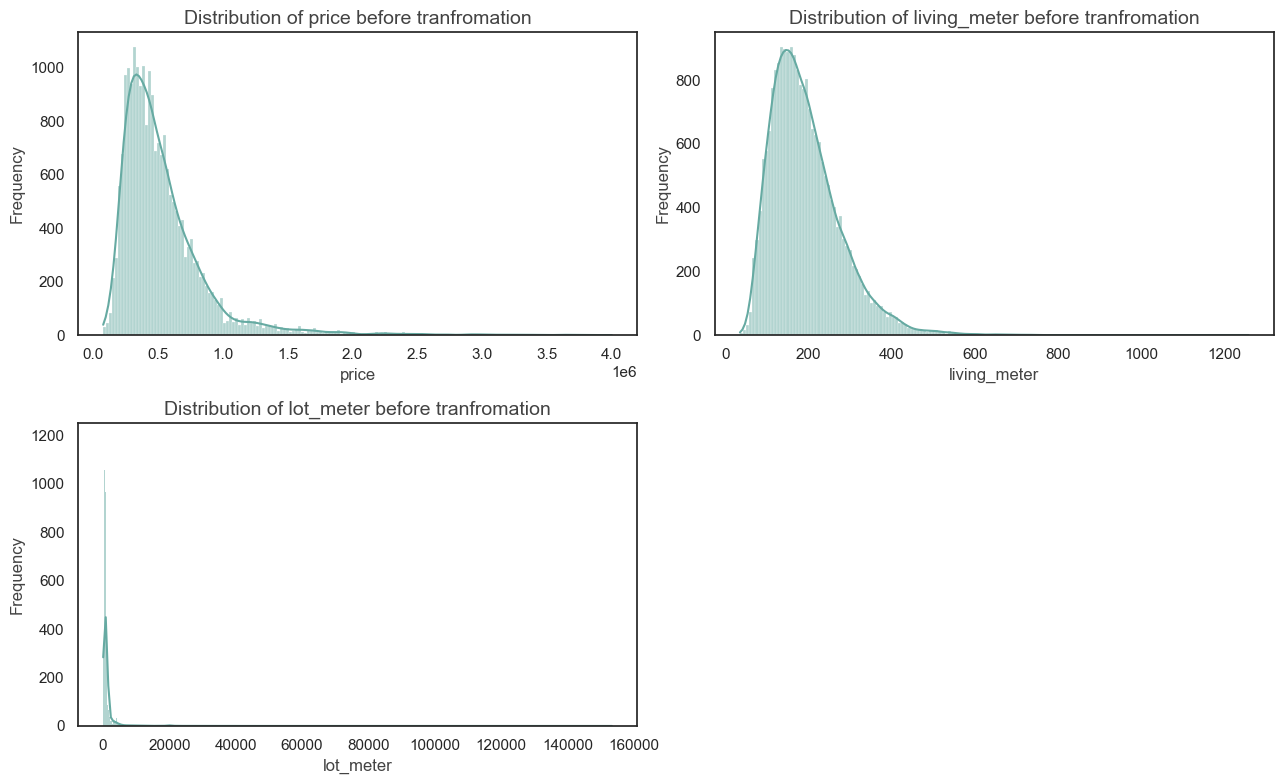

In [88]:
columns_to_plot = ['price', 'living_meter','lot_meter']

plt.figure(figsize=(13, 8))

for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = plt.subplot(2, 2, i + 1)
    sns.histplot(x=column, kde=True, data=data7, ax=ax, color='#66aaa2')
    
    plt.xlabel(column, color='#434343', fontsize=12)
    plt.ylabel("Frequency", color='#434343', fontsize=12)
    plt.title(f"Distribution of {column} before tranfromation", color='#434343', fontsize=14)

plt.subplots_adjust(hspace=0.4)    
plt.tight_layout()
plt.show()

In [89]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    data7[column] = np.log(data7[column])

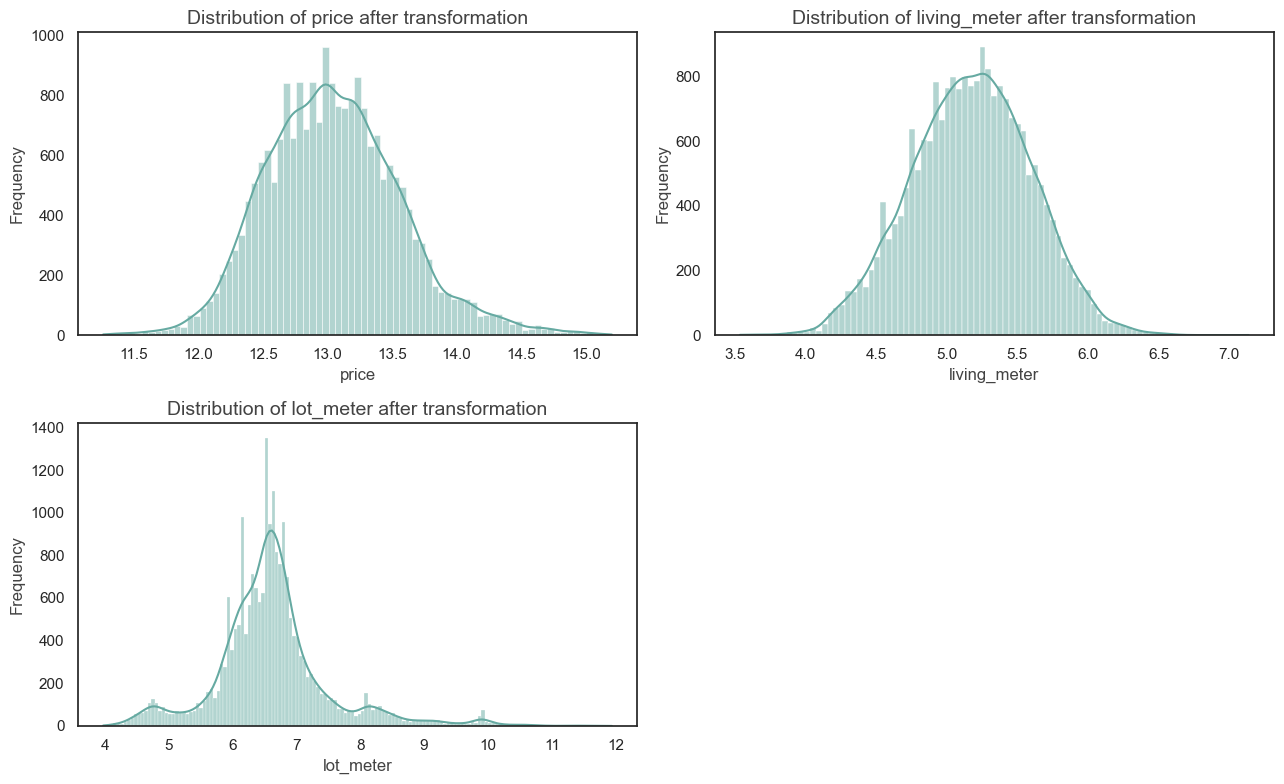

In [90]:
columns_to_plot = ['price', 'living_meter','lot_meter']

plt.figure(figsize=(13, 8))

for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = plt.subplot(2, 2, i + 1)
    sns.histplot(x=column, kde=True, data=data7, ax=ax, color='#66aaa2')
    
    plt.xlabel(column, color='#434343', fontsize=12)
    plt.ylabel("Frequency", color='#434343', fontsize=12)
    plt.title(f"Distribution of {column} after transformation", color='#434343', fontsize=14)

plt.subplots_adjust(hspace=0.4)    
plt.tight_layout()
plt.show()

In [91]:
skew_df = pd.DataFrame(data7[['price', 'living_meter','lot_meter']].columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data7[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

Feature      Skew  Absolute Skew  Skewed
0  price         0.390645  0.390645       False 
1  living_meter -0.042239  0.042239       False 
2  lot_meter     0.966191  0.966191       True

# Features Selection

In [92]:
data8 = data7.copy()

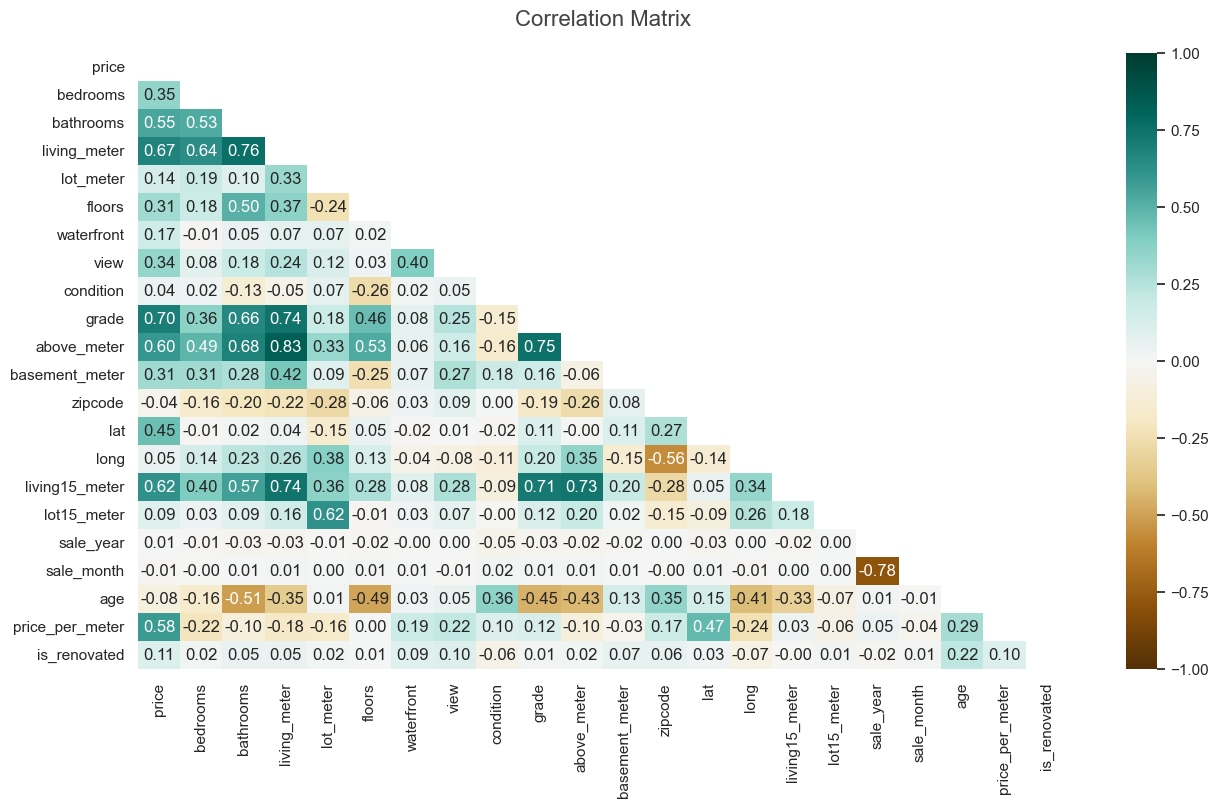

In [93]:
heat_corr = data8.astype(float)

mask = np.triu(np.ones_like(heat_corr.corr('pearson'), dtype=bool))

plt.figure(figsize=(15, 8))
sns.set_theme(style="white", font_scale=1)

sns.heatmap(heat_corr.corr('pearson'), cmap="BrBG", mask=mask, vmin=-1, vmax=1, annot=True, fmt=".2f")

plt.title("Correlation Matrix", fontsize=16, pad=20, color="#434343")
# plt.savefig('heat_map.png')

plt.show()

- The darker values mean that the features have a higher correlation.
- The highest correlation between features is 0.87, between above_meter and living_meter which is make sense because living_meter includes above_meter. (living_meter  = above_meter  + basement_meter)
- We can see that the pairs lot_meter/lot15_meter and living_meter/living15_meter have a high correlation, which makes sense as well, We'll see if we want to remove one of each pair in feature selection.

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def compute_vif(considered_features, data):
    X = data[considered_features]
    
    X = X.apply(pd.to_numeric, errors='coerce')
    
    X = X.dropna()
    
    non_constant_columns = X.columns[X.var() > 0]
    X = X[non_constant_columns]
    
    X = add_constant(X)
    
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Feature'] != 'const']
    return vif

In [95]:
considered_features = ['bedrooms', 'bathrooms', 'living_meter', 'lot_meter', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'above_meter',
       'basement_meter', 'zipcode', 'living15_meter',
       'lot15_meter', 'sale_year', 'sale_month', 'age',
       'is_renovated']
# compute vif
compute_vif(considered_features, data=data8).sort_values('VIF', ascending=False)

Feature        VIF
3   living_meter    14.426519
10  above_meter     12.457570
11  basement_meter  4.663391 
2   bathrooms       3.388600 
9   grade           3.270324 
13  living15_meter  2.958858 
4   lot_meter       2.732535 
15  sale_year       2.593556 
16  sale_month      2.583313 
5   floors          2.480468 
17  age             2.247899 
1   bedrooms        1.861810 
14  lot15_meter     1.796884 
7   view            1.418341 
12  zipcode         1.346522 
8   condition       1.256787 
6   waterfront      1.200919 
18  is_renovated    1.150392

- Remove : "basement_meter" and "above_meter" and keep "living_meter" because they are highly correlated with each other and "above_meter" is highly correlated with "grade"
- Remove : "lot15_meter" 
- Remove : "living15_meter" because it is highly correlated with the feature 'grade' and 'above_meter'

In [96]:
considered_features = ['living_meter', 'lot_meter', 'waterfront', 'view', 'condition',
       'grade', 'sale_month', 'age', 'is_renovated','zipcode']
# compute vif
compute_vif(considered_features, data=data8).sort_values('VIF', ascending=False)

Feature       VIF
6   grade         2.522768
1   living_meter  2.487451
8   age           1.808307
4   view          1.329849
10  zipcode       1.292544
2   lot_meter     1.248859
5   condition     1.220395
3   waterfront    1.194396
9   is_renovated  1.117053
7   sale_month    1.001420

## New Features

depending on correlation matrix and VIF i have chosen the following features to make it easier for the user to fill their information in the web page

['price','living_meter', 'lot_meter', 'waterfront', 'view', 'condition','grade', 'sale_month', 'age', 'is_renovated','zipcode']

In [97]:
data9 = data8.copy()

In [98]:
features = ['price','living_meter', 'lot_meter', 'waterfront', 'view', 'condition',
       'grade', 'sale_month', 'age', 'is_renovated','zipcode']

In [99]:
data9 = data9[features]

In [100]:
data9.columns

Index(['price', 'living_meter', 'lot_meter', 'waterfront', 'view', 'condition',
       'grade', 'sale_month', 'age', 'is_renovated', 'zipcode'],
      dtype='object')

In [101]:
data9.head(3)

price  living_meter  lot_meter waterfront view condition grade  \
0  12.309982  4.697075      6.263212   0          0    3         7      
1  13.195614  5.475463      6.511454   0          0    3         7      
2  12.100712  4.270187      6.834141   0          0    3         6      

  sale_month  age is_renovated  zipcode  
0  10         59   0            98178    
1  12         63   1            98125    
2  2          82   0            98028

In [102]:
# X1 = data9.drop(['price'],axis='columns')
# y1 = data9['price']

# X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [103]:
# catb_model_f = CatBoostRegressor(verbose=0, random_state=42,depth=8,iterations=1000,learning_rate=0.1)

# catb_model_f.fit(X_train, y_train)

# y_pred_catb = catb_model_f.predict(X_test)

# model_score_catb = catb_model_f.score(X_test,y_test)

# r_square_catb = metrics.r2_score(y_test, y_pred_catb)
# mse_catb = metrics.mean_squared_error(y_test, y_pred_catb)
# mae_catb = metrics.median_absolute_error(y_test, y_pred_catb)
# ev_catb = metrics.explained_variance_score(y_test, y_pred_catb)

# print("Model Score            : ", model_score_catb*100)
# print("R Square               : ", r_square_catb*100)
# print("Mean Squared Error     : ", mse_catb)
# print("Root Mean Squared Error: ", mse_catb**(1/2))
# print("Median Absolute Error  : ", mae_catb)
# print("Explained Variance     : ", ev_catb)

# Split the Data

In [104]:
data10 = data9.copy()

In [105]:
object_columns = ['waterfront', 'view', 'condition', 'grade', 'sale_month', 'is_renovated']

data10[object_columns] = data10[object_columns].astype('float64')

In [106]:
X = data10.drop('price',axis='columns')
y = data10['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [107]:
X.head(2)

living_meter  lot_meter  waterfront  view  condition  grade  sale_month  \
0  4.697075      6.263212   0.0         0.0   3.0        7.0    10.0         
1  5.475463      6.511454   0.0         0.0   3.0        7.0    12.0         

   age  is_renovated  zipcode  
0  59   0.0           98178    
1  63   1.0           98125

In [108]:
y.head(2)

0    12.309982
1    13.195614
Name: price, dtype: float64

## Function to try number of Models and tuning their hyperparameter and get the result of their performance

In [109]:
def train_and_evaluate_with_tuning(model, X_train, y_train, X_test, y_test, param_grid):

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    
    best_model.fit(X_train, y_train)
    
    y_pred = best_model.predict(X_test)

    model_score = best_model.score(X_test, y_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = metrics.median_absolute_error(y_test, y_pred)
    ev = metrics.explained_variance_score(y_test, y_pred)

    return {
        "Model": type(best_model).__name__,
        "Model Score": model_score * 100,
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse,
        "Median Absolute Error": mae,
        "Explained Variance": ev,
        "Best Hyperparameters": grid_search.best_params_
    }

## The Models and Their Hyperparameters

In [110]:
models_and_params = [
    
    (LinearRegression(), {}),
    
    (DecisionTreeRegressor(), {'max_depth': list(np.arange(1,20)), 'min_samples_split': list(np.arange(1,10))}),
    
    (RandomForestRegressor(), {'n_estimators': [5, 20, 50, 70, 100]}),
    
    (XGBRegressor(), {'learning_rate': [0.01, 0.1], 'max_depth': [2, 3, 5], 'n_estimators': [100, 200, 300]}),
    
    (Lasso(), {'alpha': [0.01, 0.1]}),
    
    (Ridge(), {'alpha': [0.01, 0.1]}),
    
    (ElasticNet(), {'alpha': [0.01, 0.1], 'l1_ratio': [0.5, 0.7]}),
    
    (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7]}),
    
    (GradientBoostingRegressor(), {'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'n_estimators': [100, 200]}),
    
    (LGBMRegressor(), {'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [4, 6, 8], 'num_leaves': [10, 20, 30], 'n_estimators': [100, 200, 300]}),
    
    (CatBoostRegressor(silent=True), {'learning_rate': [0.01, 0.1], 'depth': [3, 6, 8], "iterations": [200, 500, 1000]})
]

## Get the Results of the models with Tuning

In [111]:
results_after_tuning = []

In [112]:
for model, param_grid in models_and_params:
    result_after = train_and_evaluate_with_tuning(model, X_train, y_train, X_test, y_test, param_grid)
    results_after_tuning.append(result_after)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data points in the train set: 17258, number of used features: 10
[LightGBM] [Info] Start training from score 13.047379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [113]:
models_results = pd.DataFrame(results_after_tuning)

In [114]:
models_results

Model  Model Score  Mean Squared Error  \
0   LinearRegression           62.879567    0.100619             
1   DecisionTreeRegressor      73.301892    0.072368             
2   RandomForestRegressor      82.376617    0.047770             
3   XGBRegressor               87.869335    0.032882             
4   Lasso                      62.039571    0.102896             
5   Ridge                      62.879542    0.100619             
6   ElasticNet                 62.319320    0.102138             
7   KNeighborsRegressor        64.092170    0.097332             
8   GradientBoostingRegressor  86.961096    0.035343             
9   LGBMRegressor              87.866129    0.032890             
10  CatBoostRegressor          88.392939    0.031462             

    Root Mean Squared Error  Median Absolute Error  Explained Variance  \
0   0.317205                 0.215890               0.628812             
1   0.269013                 0.144747               0.733019             
2   0.218564                 0.109913               0.823849             
3   0.181333                 0.097310               0.878693             
4   0.320774                 0.216544               0.620400             
5   0.317205                 0.215887               0.628812             
6   0.319590                 0.217242               0.623200             
7   0.311981                 0.156604               0.646165             
8   0.187998                 0.103450               0.869612             
9   0.181357                 0.094977               0.878662             
10  0.177376                 0.093300               0.883932             

                                                             Best Hyperparameters  
0   {}                                                                             
1   {'max_depth': 14, 'min_samples_split': 9}                                      
2   {'n_estimators': 70}                                                           
3   {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}                    
4   {'alpha': 0.01}                                                                
5   {'alpha': 0.1}                                                                 
6   {'alpha': 0.01, 'l1_ratio': 0.5}                                               
7   {'n_neighbors': 3}                                                             
8   {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}                    
9   {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'num_leaves': 30}  
10  {'depth': 6, 'iterations': 1000, 'learning_rate': 0.1}

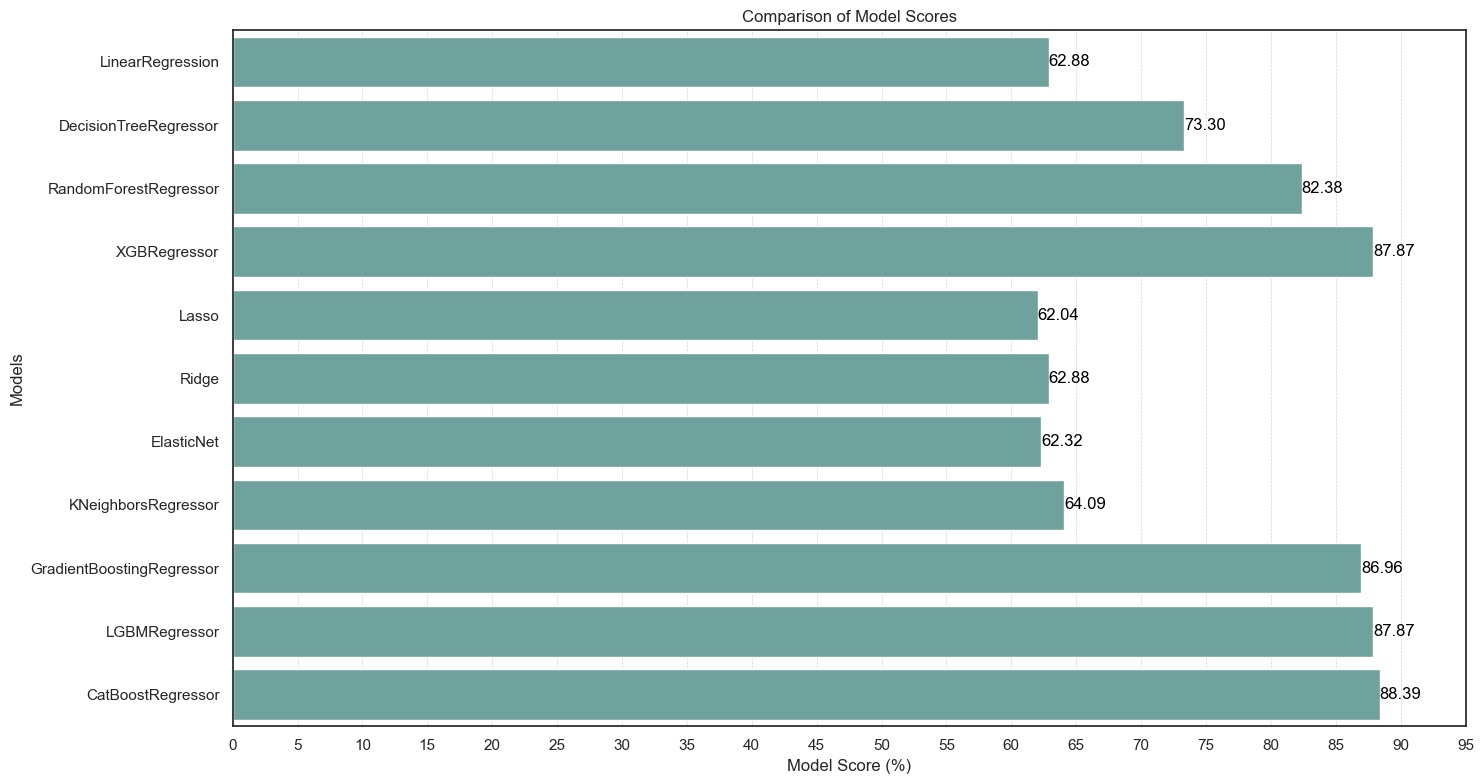

In [115]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="Model Score", y="Model", data=models_results, orient="h", color='#66aaa2')
ax.set_title("Comparison of Model Scores")
ax.set_ylabel("Models")
ax.set_xlabel("Model Score (%)")
ax.set_xticks(np.arange(0, 100, 5))
ax.grid(axis='x', linestyle='--', linewidth=0.5, color='lightgray')

for i, v in enumerate(models_results['Model Score']):
    ax.text(v, i, f"{v:.2f}", va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

## The Best and Chosen Model is CatBoost

In [116]:
catb_model_f = CatBoostRegressor(verbose=0, random_state=42,depth=6,iterations=1000,learning_rate=0.1)

catb_model_f.fit(X_train, y_train)

y_pred_catb = catb_model_f.predict(X_test)

model_score_catb = catb_model_f.score(X_test,y_test)

r_square_catb = metrics.r2_score(y_test, y_pred_catb)
mse_catb = metrics.mean_squared_error(y_test, y_pred_catb)
mae_catb = metrics.median_absolute_error(y_test, y_pred_catb)
ev_catb = metrics.explained_variance_score(y_test, y_pred_catb)

print("Model Score            : ", model_score_catb*100)
print("R Square               : ", r_square_catb*100)
print("Mean Squared Error     : ", mse_catb)
print("Root Mean Squared Error: ", mse_catb**(1/2))
print("Median Absolute Error  : ", mae_catb)
print("Explained Variance     : ", ev_catb)

Model Score            :  88.5063945368753
R Square               :  88.5063945368753
Mean Squared Error     :  0.031154701285413738
Root Mean Squared Error:  0.176506944014715
Median Absolute Error  :  0.0939515236580224
Explained Variance     :  0.8850646326999053


Text(0, 0.5, 'Predictions')

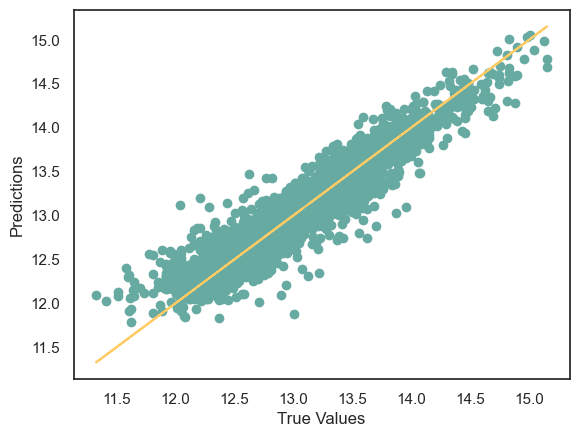

In [117]:
plt.scatter(y_test, y_pred_catb, c='#66aaa2')
plt.plot(y_test,y_test,'#ffcb64')
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [118]:
print("Training set Accuracy:",round(catb_model_f.score(X_train,y_train),3)*100)
print("Test set Accuracy:",round(catb_model_f.score(X_test,y_test),3)*100)

Training set Accuracy: 93.10000000000001
Test set Accuracy: 88.5


In [119]:
data9.head()

price  living_meter  lot_meter waterfront view condition grade  \
0  12.309982  4.697075      6.263212   0          0    3         7      
1  13.195614  5.475463      6.511454   0          0    3         7      
2  12.100712  4.270187      6.834141   0          0    3         6      
3  13.311329  5.204501      6.140994   0          0    5         7      
4  13.142166  5.050349      6.620947   0          0    3         8      

  sale_month  age is_renovated  zipcode  
0  10         59   0            98178    
1  12         63   1            98125    
2  2          82   0            98028    
3  12         49   0            98136    
4  2          28   0            98074

['price','living_meter', 'lot_meter', 'waterfront', 'view', 'condition','grade', 'sale_month', 'age', 'is_renovated','zipcode']

In [120]:
# import pickle
# with open('model.pkl','wb') as file:
#     pickle.dump(catb_model_f,file)